<a href="https://colab.research.google.com/github/Karim-Anwar/masterProject/blob/main/EDA_floors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import glob
import datetime

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Set the random seed
random.seed(42)
np.random.seed(42)

In [5]:
def get_csv_file_paths(root_directory):
    csv_file_paths = []
    for root, dirs, files in os.walk(root_directory):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                csv_file_paths.append(file_path)
    return csv_file_paths

In [6]:
def plot_correlation_matrices(csv_paths):
    for path in csv_paths:
        # Read CSV file into a pandas DataFrame
        df = pd.read_csv(path)

        # Calculate correlation matrix
        correlation_matrix = df.corr()

        # Plot correlation matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
        plt.title(f"Correlation Matrix for {path}")
        plt.show()

In [7]:
def plot_correlation_matrices(csv_paths, padding=0.2):
    num_paths = len(csv_paths)
    num_cols = min(3, num_paths)
    num_rows = (num_paths - 1) // num_cols + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    fig.suptitle("Correlation Matrices")

    for i, path in enumerate(csv_paths):
        row = i // num_cols
        col = i % num_cols

        # Read CSV file into a pandas DataFrame
        df = pd.read_csv(path, parse_dates=['time'], index_col='time')

        # Calculate correlation matrix
        correlation_matrix = df.corr()

        # Plot correlation matrix in the corresponding subplot
        ax = axes[row, col] if num_paths > 1 else axes
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax)
        # Extract the filename from the path
        filename = os.path.basename(path)
        ax.set_title(f"Correlation Matrix: {filename}")

        # Add padding between rows and columns
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontsize='small')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize='small')
        ax.tick_params(axis='both', which='both', pad=padding)

    # Remove empty subplots if necessary
    if num_paths < num_rows * num_cols:
        for i in range(num_paths, num_rows * num_cols):
            fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

In [8]:
def minMaxnorm(df):
  normDF = (df-df.min())/(df.max()-df.min())
  return normDF

In [9]:

# Directory path where your datasets are stored
# directory_path = '/content/drive/MyDrive/exploratory-data-analysis/cleaned_data'

# datasets = get_csv_file_paths(directory_path)

In [10]:
# plot_correlation_matrices(datasets)

In [11]:

# # Pattern to match the dataset files (e.g., CSV files)
# file_pattern = '*.csv'

# # Get a list of file paths matching the pattern in the directory
# file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# # Create an empty list to store the scaled datasets
# scaled_datasets = []

# # Iterate over the file paths and scale each dataset
# for file_path in file_paths:
#     # Load the dataset from CSV
#     dataset = pd.read_csv(file_path, parse_dates=['time'], index_col='time')


#     # Perform Min-Max normalization using your minMaxnorm function on the selected columns
#     dataset = minMaxnorm(dataset)

#     # Append the scaled dataset to the list
#     scaled_datasets.append(dataset)

# # Determine the number of rows and columns for subplots
# num_plots = len(scaled_datasets)
# num_cols = 3  # Set the number of columns for subplots
# num_rows = (num_plots + num_cols - 1) // num_cols  # Compute the number of rows based on the number of columns

# # Create the subplots with appropriate size
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# # Flatten the axes array to simplify indexing
# axes = axes.flatten()

# # Iterate over the scaled datasets and plot each one
# for i, dataset in enumerate(scaled_datasets):
#     # Select the subplot for the current dataset
#     ax = axes[i]


#     ax.plot(dataset, label=dataset.columns)

#     # Set the title for the subplot
#     ax.set_title(os.path.basename(file_paths[i]))  # Use the file name as the subplot title

#     # Add legend to the subplot
#     ax.legend()

#     # Set x-axis and y-axis labels
#     ax.set_xlabel('Time')
#     ax.set_ylabel('Scaled Value')

# # Adjust the spacing between subplots
# fig.tight_layout()

# # Show the plot
# plt.show()

In [12]:
# # Pattern to match the dataset files (e.g., CSV files)
# file_pattern = '*.csv'

# # Number of datasets to randomly select
# num_datasets_to_plot = 6

# # Get a list of file paths matching the pattern in the directory
# file_paths = glob.glob(os.path.join(directory_path, file_pattern))

# # Randomly select a specified number of datasets
# random_file_paths = random.sample(file_paths, num_datasets_to_plot)

# # Create the subplots grid
# num_rows = (num_datasets_to_plot // 2) + (num_datasets_to_plot % 2)
# fig, axs = plt.subplots(num_rows, 2, figsize=(12, 8))

# # Flatten the axs array if there is only one subplot
# if num_datasets_to_plot == 1:
#     axs = [axs]

# # Iterate over the randomly selected file paths and plot each dataset in a separate subplot
# for i, file_path in enumerate(random_file_paths):
#     # Load the dataset from CSV
#     dataset = pd.read_csv(file_path, parse_dates=['time'], index_col='time')

#     # Perform Min-Max normalization using your minMaxnorm function on the selected columns
#     dataset = minMaxnorm(dataset)

#     # Determine the row and column for the subplot
#     row = i // 2
#     col = i % 2

#     # Plot the dataset in the corresponding subplot
#     axs[row][col].plot(dataset)
#     axs[row][col].set_title(f'Dataset {i+1}')
#     axs[row][col].set_xlabel('Time')
#     axs[row][col].set_ylabel('Scaled Value')

# # Adjust the spacing between subplots
# plt.tight_layout()

# # Show the plot
# plt.show()

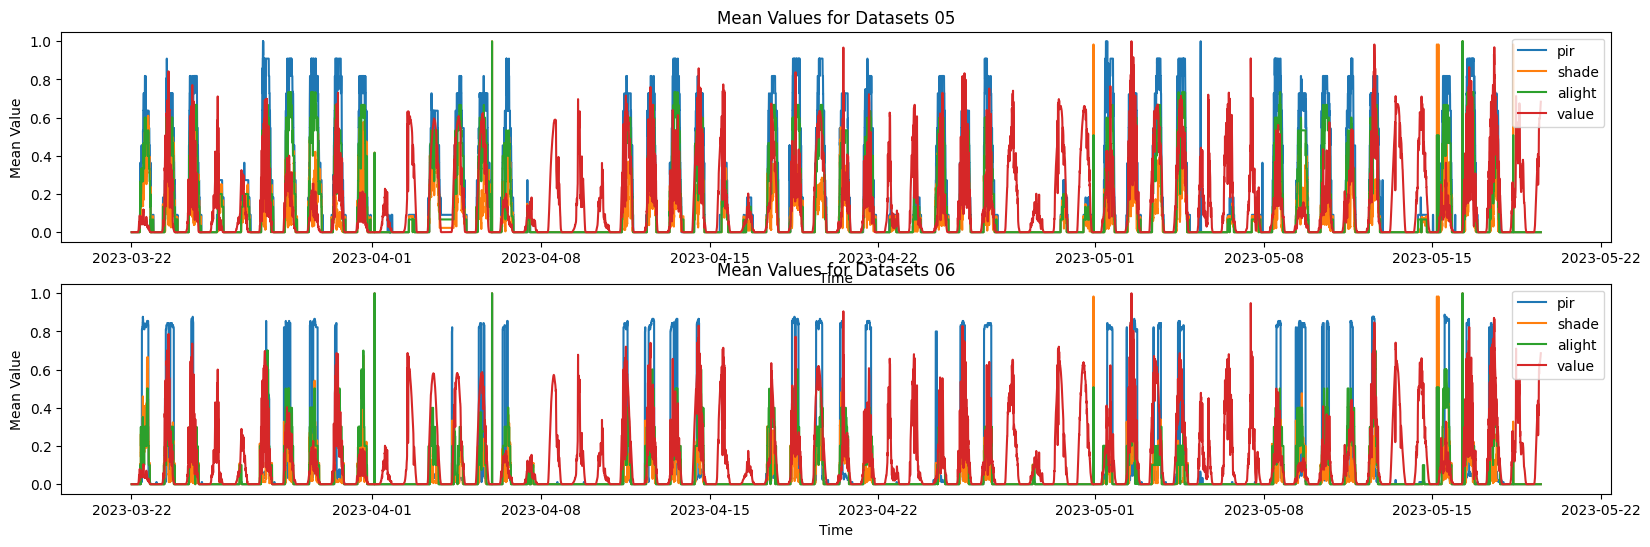

In [13]:

directory_path = '/content/drive/MyDrive/exploratory-data-analysis/clnd_data_min'
file_pattern = '*.csv'

file_paths = glob.glob(os.path.join(directory_path, file_pattern))

datasets_05 = []
datasets_06 = []
for file_path in file_paths:
    file_name = os.path.basename(file_path)
    prefix = file_name[:2]  # Extract the prefix from the file name
    df = pd.read_csv(file_path, parse_dates=['time'], index_col='time')
    if prefix == '05':
        datasets_05.append(df)
    elif prefix == '06':
        datasets_06.append(df)

merged_05 = pd.concat(datasets_05)
merged_06 = pd.concat(datasets_06)

grouped_05 = merged_05.groupby('time').mean()
grouped_06 = merged_06.groupby('time').mean()
# Apply min-max normalization using the minMaxnorm function
grouped_05 = minMaxnorm(grouped_05)
grouped_06 = minMaxnorm(grouped_06)

# Plot the mean values
fig, ax = plt.subplots(2, 1, figsize=(20, 6))

# Plotting for Datasets 05
for column in grouped_05.columns:
    ax[0].plot(grouped_05.index, grouped_05[column], label=column)

# Plotting for Datasets 06
for column in grouped_06.columns:
    ax[1].plot(grouped_06.index, grouped_06[column], label=column)

# Set the title and labels
ax[0].set_title('Mean Values for Datasets 05')
ax[1].set_title('Mean Values for Datasets 06')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Mean Value')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Mean Value')

# Add legend to each subplot
ax[0].legend()
ax[1].legend()

# Show the plot
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

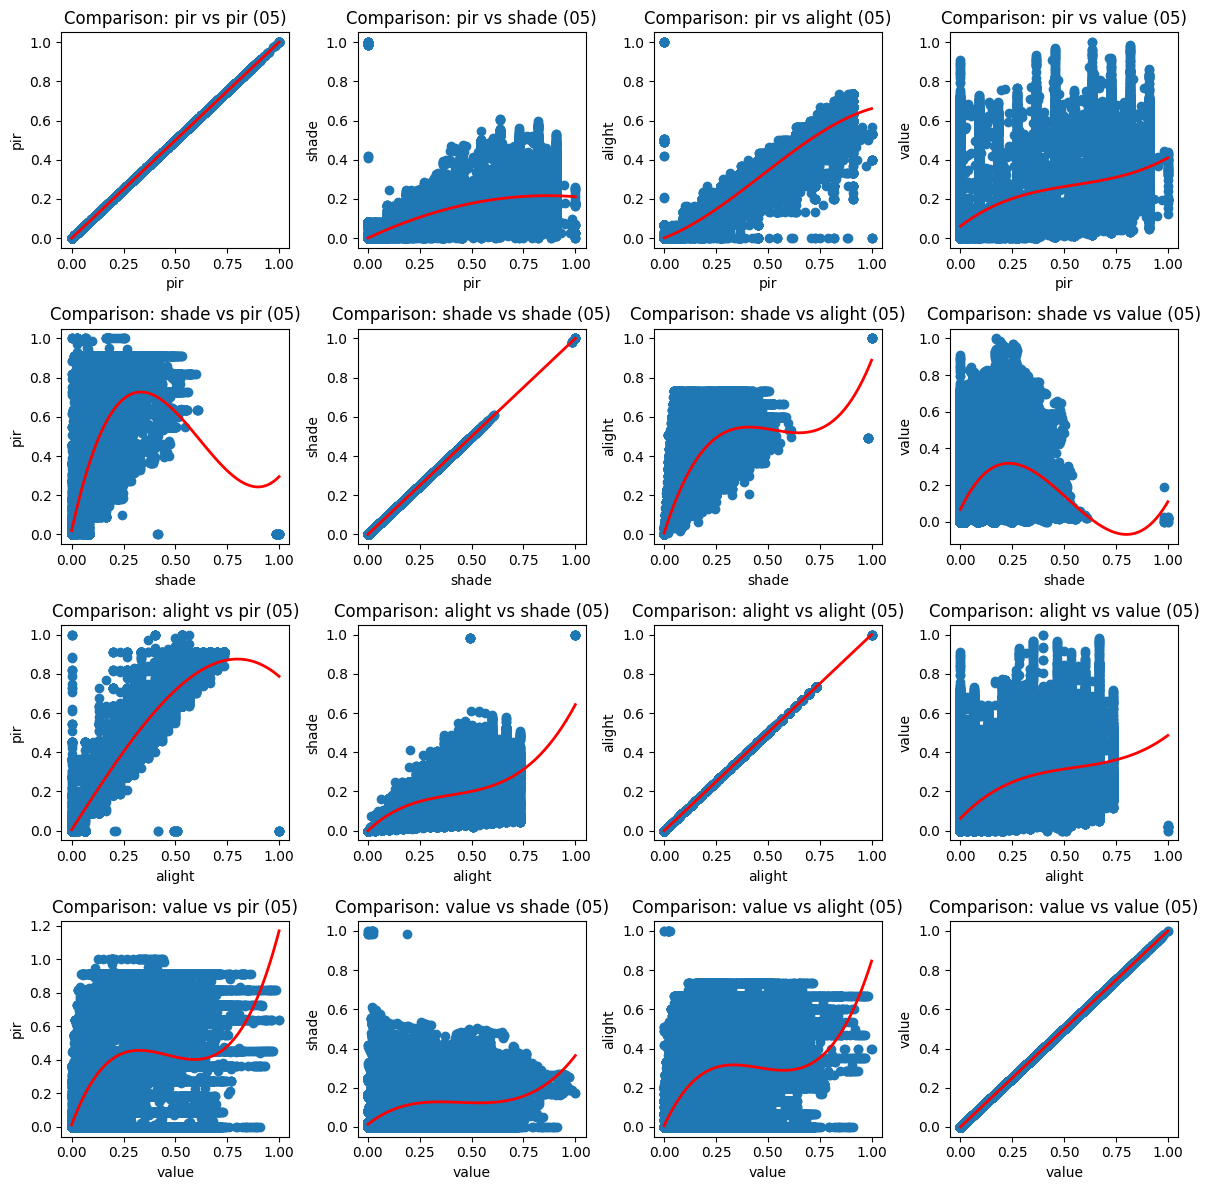

In [15]:
columns = grouped_05.columns
# Create subplots for column comparisons in Datasets 05
fig, axs = plt.subplots(len(columns), len(columns), figsize=(12, 12))

# Iterate over all combinations of columns
for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        axs[i, j].plot(grouped_05[col1], grouped_05[col2], 'o')

        # Perform polynomial regression
        degree = 3  # Set the degree of the polynomial
        X = grouped_05[col1].values.reshape(-1, 1)
        y = grouped_05[col2].values.reshape(-1, 1)

        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(X)

        # Fit the polynomial regression model
        model = LinearRegression()
        model.fit(X_poly, y)

        # Predict the values using the polynomial regression model
        X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        X_pred_poly = poly_features.transform(X_pred)
        y_pred = model.predict(X_pred_poly)

        # Plot the fitted curve
        axs[i, j].plot(X_pred, y_pred, color='red', linewidth=2)

        axs[i, j].set_title(f'Comparison: {col1} vs {col2} (05)')
        axs[i, j].set_xlabel(col1)
        axs[i, j].set_ylabel(col2)

plt.tight_layout()

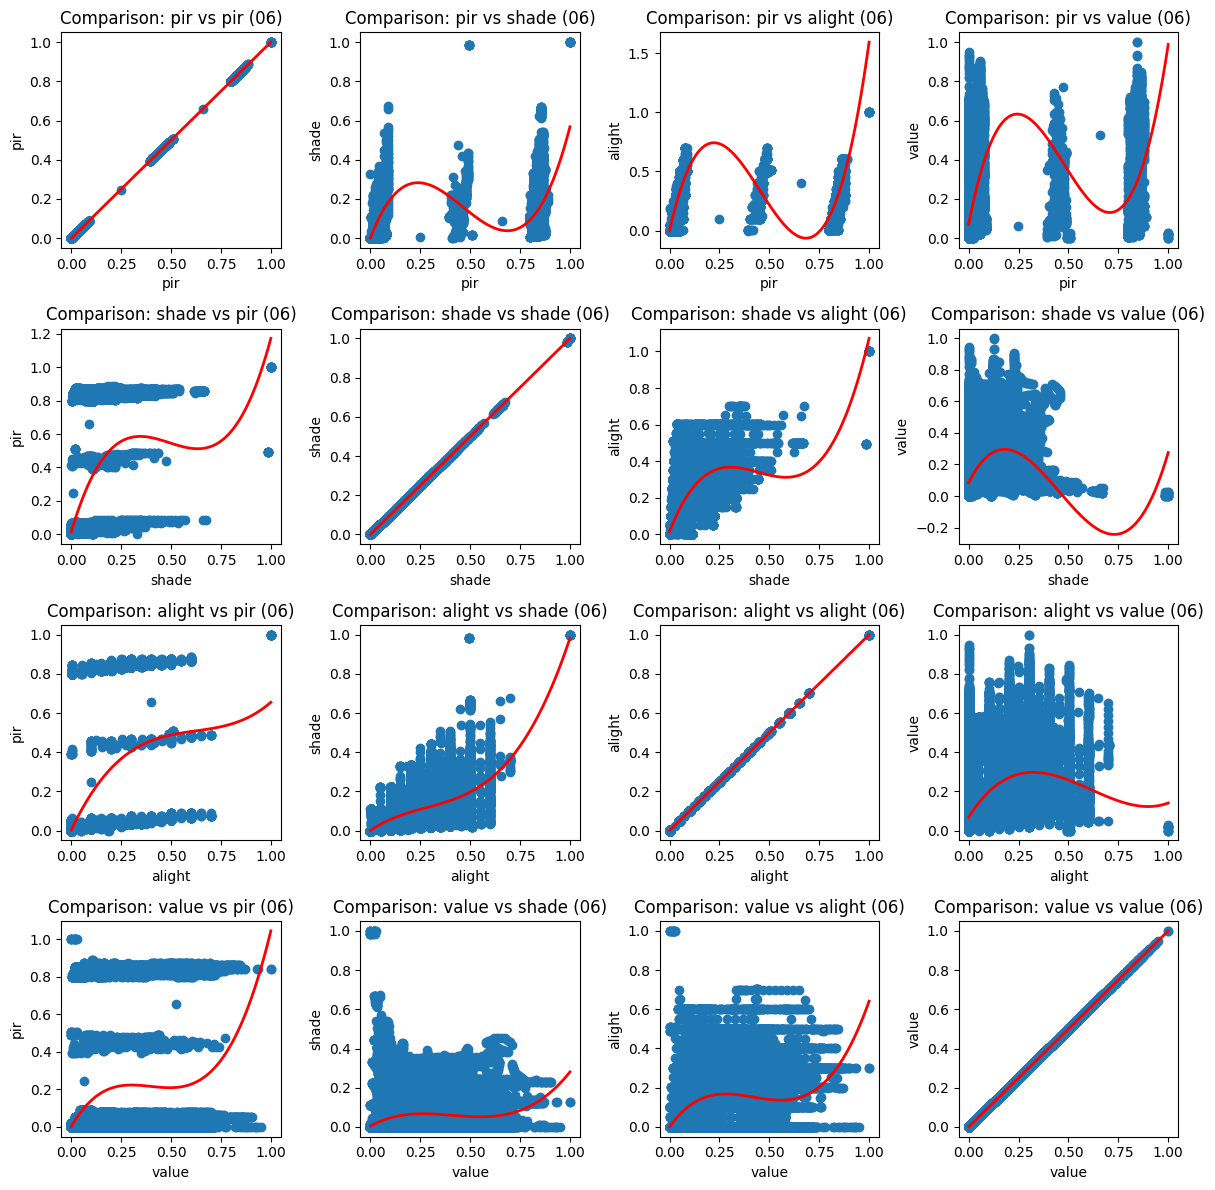

In [16]:
# Create subplots for column comparisons in Datasets 06
fig, axs = plt.subplots(len(columns), len(columns), figsize=(12, 12))

# Iterate over all combinations of columns
for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        axs[i, j].plot(grouped_06[col1], grouped_06[col2], 'o')

        # Perform polynomial regression
        degree = 3  # Set the degree of the polynomial
        X = grouped_06[col1].values.reshape(-1, 1)
        y = grouped_06[col2].values.reshape(-1, 1)

        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(X)

        # Fit the polynomial regression model
        model = LinearRegression()
        model.fit(X_poly, y)

        # Predict the values using the polynomial regression model
        X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        X_pred_poly = poly_features.transform(X_pred)
        y_pred = model.predict(X_pred_poly)

        # Plot the fitted curve
        axs[i, j].plot(X_pred, y_pred, color='red', linewidth=2)

        axs[i, j].set_title(f'Comparison: {col1} vs {col2} (06)')
        axs[i, j].set_xlabel(col1)
        axs[i, j].set_ylabel(col2)
plt.tight_layout()

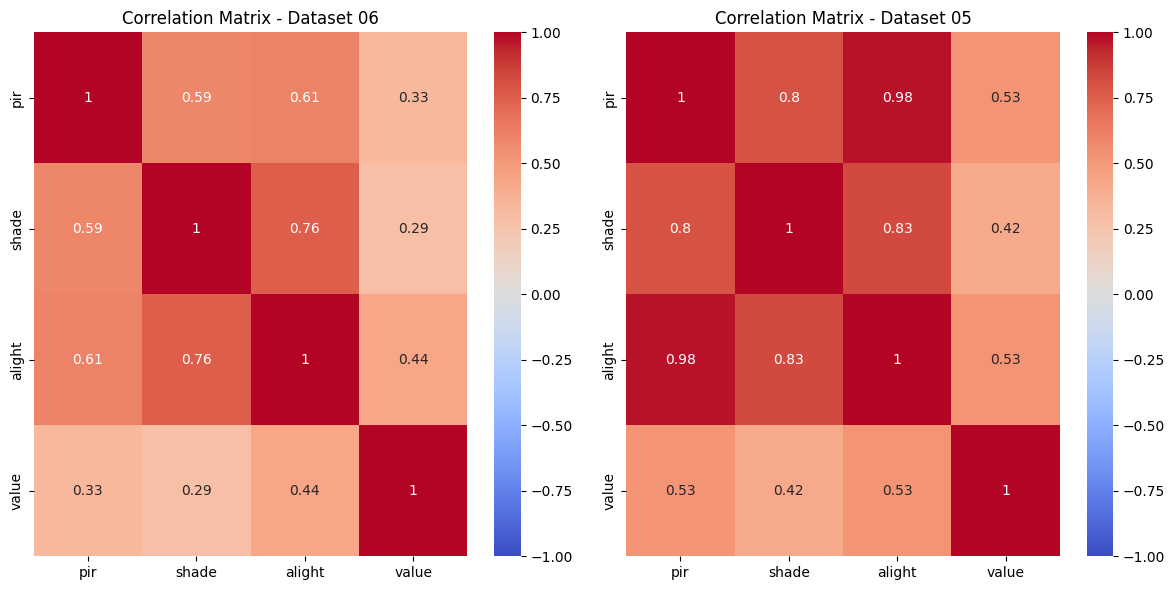

In [17]:
# Assuming you have the correlation matrices for dataset 06 and 05
corr_matrix_06 = grouped_06.corr()
corr_matrix_05 = grouped_05.corr()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the correlation matrix for dataset 06
sns.heatmap(corr_matrix_06, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Correlation Matrix - Dataset 06')

# Plot the correlation matrix for dataset 05
sns.heatmap(corr_matrix_05, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Correlation Matrix - Dataset 05')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

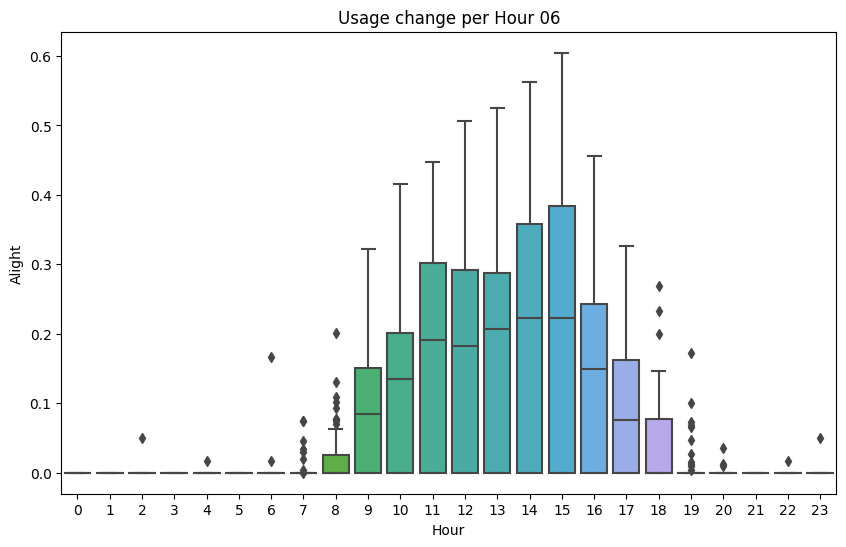

In [18]:
grouped_06_hourly = grouped_06.resample('H').mean()

# Extract the hour component from the index
grouped_06_hourly['hour'] = grouped_06_hourly.index.hour

data_per_hour = []

# Iterate over each hour
for hour in range(24):
    # Filter the data for the current hour
    data = grouped_06_hourly[grouped_06_hourly['hour'] == hour]['alight']
    data_per_hour.append(data)

fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn to create the boxplot
sns.boxplot(data=data_per_hour, ax=ax)

# Set the title and labels
ax.set_title('Usage change per Hour 06')
ax.set_xlabel('Hour')
ax.set_ylabel('Alight')

# Set the x-axis tick labels
ax.set_xticklabels(range(24))

# Show the plot
plt.show()

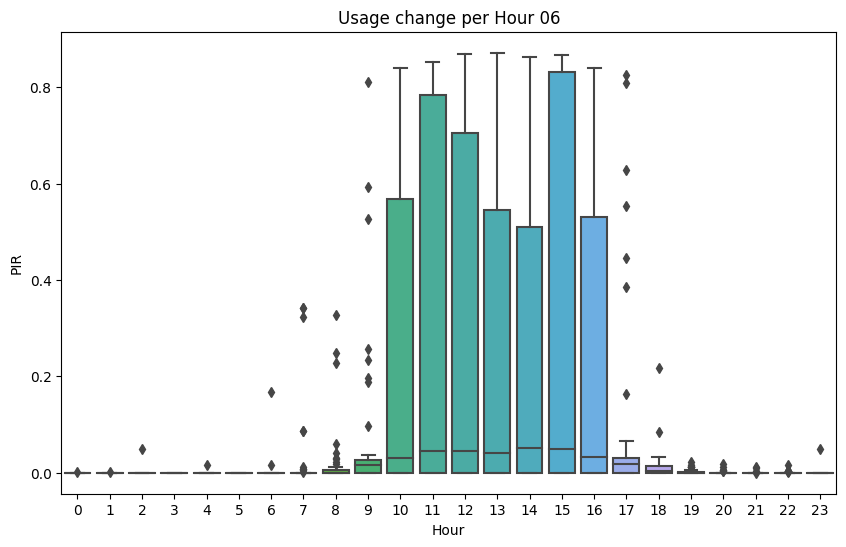

In [19]:
data_per_hour = []
# Iterate over each hour

for hour in range(24):
    # Filter the data for the current hour
    data = grouped_06_hourly[grouped_06_hourly['hour'] == hour]['pir']
    data_per_hour.append(data)

fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn to create the boxplot
sns.boxplot(data=data_per_hour, ax=ax)

# Set the title and labels
ax.set_title('Usage change per Hour 06')
ax.set_xlabel('Hour')
ax.set_ylabel('PIR')

# Set the x-axis tick labels
ax.set_xticklabels(range(24))

# Show the plot
plt.show()

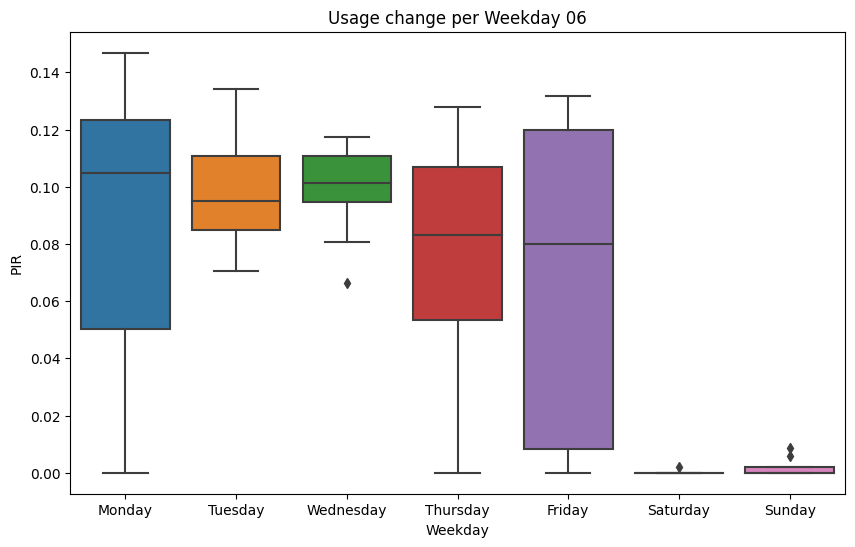

In [20]:
grouped_06_daily = grouped_06.resample('D').mean()

grouped_06_daily['weekday'] = grouped_06_daily.index.weekday
data_per_weekday = []

# Iterate over each weekday
for weekday in range(7):
    # Filter the data for the current weekday
    data = grouped_06_daily[grouped_06_daily['weekday'] == weekday]['alight']
    data_per_weekday.append(data)

# Create a single plot for all the boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn to create the boxplot
sns.boxplot(data=data_per_weekday, ax=ax)

# Set the title and labels
ax.set_title('Usage change per Weekday 06')
ax.set_xlabel('Weekday')
ax.set_ylabel('PIR')

# Set the x-axis tick labels
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticklabels(weekday_labels)

# Show the plot
plt.show()

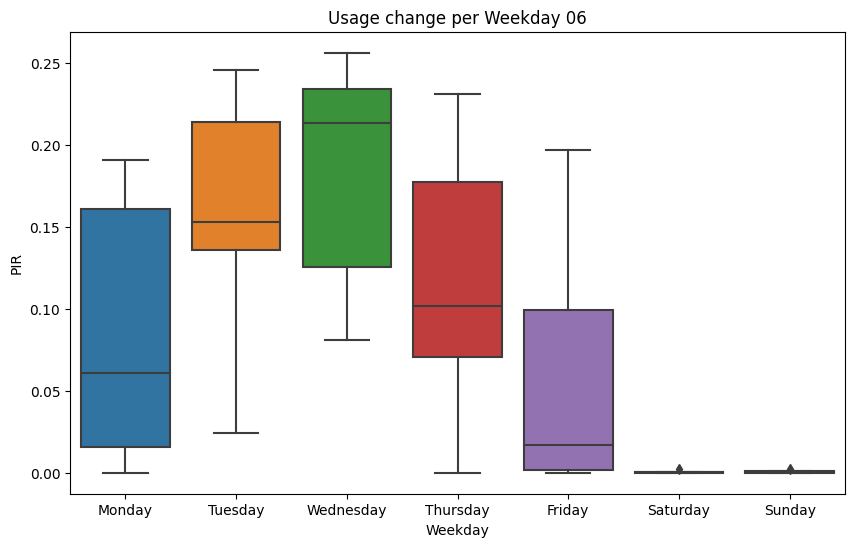

In [21]:
data_per_weekday = []

# Iterate over each weekday
for weekday in range(7):
    # Filter the data for the current weekday
    data = grouped_06_daily[grouped_06_daily['weekday'] == weekday]['pir']
    data_per_weekday.append(data)

# Create a single plot for all the boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn to create the boxplot
sns.boxplot(data=data_per_weekday, ax=ax)

# Set the title and labels
ax.set_title('Usage change per Weekday 06')
ax.set_xlabel('Weekday')
ax.set_ylabel('PIR')

# Set the x-axis tick labels
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticklabels(weekday_labels)

# Show the plot
plt.show()

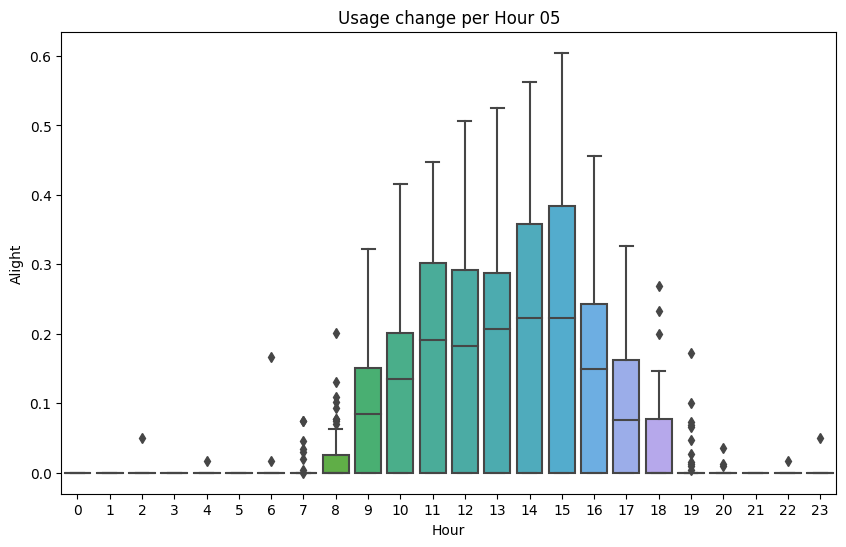

In [22]:
grouped_05_hourly = grouped_05.resample('H').mean()

# Extract the hour component from the index
grouped_05_hourly['hour'] = grouped_05_hourly.index.hour

data_per_hour = []

# Iterate over each hour
for hour in range(24):
    # Filter the data for the current hour
    data = grouped_06_hourly[grouped_05_hourly['hour'] == hour]['alight']
    data_per_hour.append(data)

fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn to create the boxplot
sns.boxplot(data=data_per_hour, ax=ax)

# Set the title and labels
ax.set_title('Usage change per Hour 05')
ax.set_xlabel('Hour')
ax.set_ylabel('Alight')

# Set the x-axis tick labels
ax.set_xticklabels(range(24))

# Show the plot
plt.show()

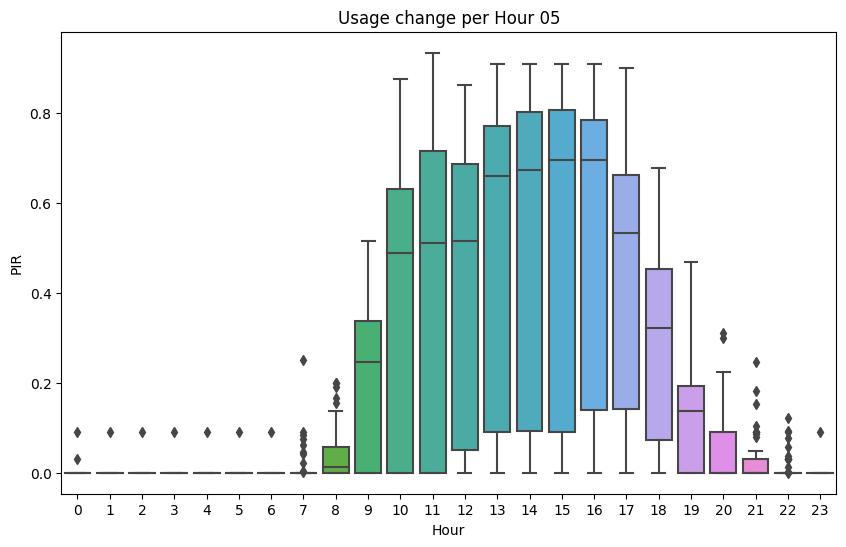

In [23]:
data_per_hour = []
# Iterate over each hour

for hour in range(24):
    # Filter the data for the current hour
    data = grouped_05_hourly[grouped_05_hourly['hour'] == hour]['pir']
    data_per_hour.append(data)

fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn to create the boxplot
sns.boxplot(data=data_per_hour, ax=ax)

# Set the title and labels
ax.set_title('Usage change per Hour 05')
ax.set_xlabel('Hour')
ax.set_ylabel('PIR')

# Set the x-axis tick labels
ax.set_xticklabels(range(24))

# Show the plot
plt.show()

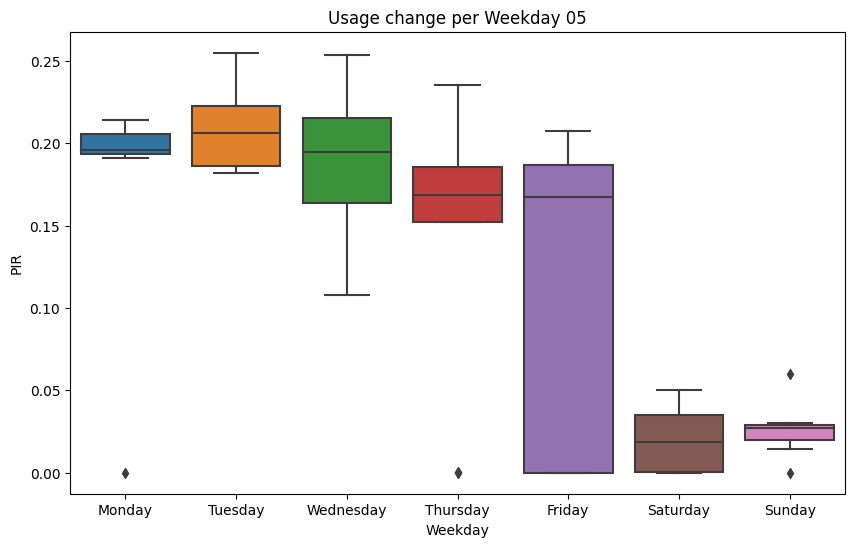

In [24]:
grouped_05_daily = grouped_05.resample('D').mean()

grouped_05_daily['weekday'] = grouped_05_daily.index.weekday

data_per_weekday = []

# Iterate over each weekday
for weekday in range(7):
    # Filter the data for the current weekday
    data = grouped_05_daily[grouped_05_daily['weekday'] == weekday]['alight']
    data_per_weekday.append(data)

# Create a single plot for all the boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn to create the boxplot
sns.boxplot(data=data_per_weekday, ax=ax)

# Set the title and labels
ax.set_title('Usage change per Weekday 05')
ax.set_xlabel('Weekday')
ax.set_ylabel('PIR')

# Set the x-axis tick labels
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticklabels(weekday_labels)

# Show the plot
plt.show()

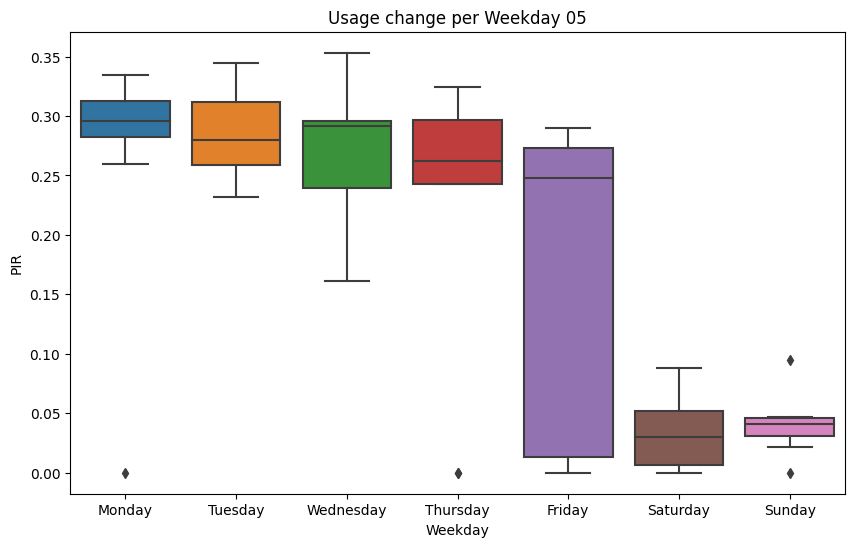

In [25]:
data_per_weekday = []

# Iterate over each weekday
for weekday in range(7):
    # Filter the data for the current weekday
    data = grouped_05_daily[grouped_05_daily['weekday'] == weekday]['pir']
    data_per_weekday.append(data)

# Create a single plot for all the boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn to create the boxplot
sns.boxplot(data=data_per_weekday, ax=ax)

# Set the title and labels
ax.set_title('Usage change per Weekday 05')
ax.set_xlabel('Weekday')
ax.set_ylabel('PIR')

# Set the x-axis tick labels
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticklabels(weekday_labels)

# Show the plot
plt.show()

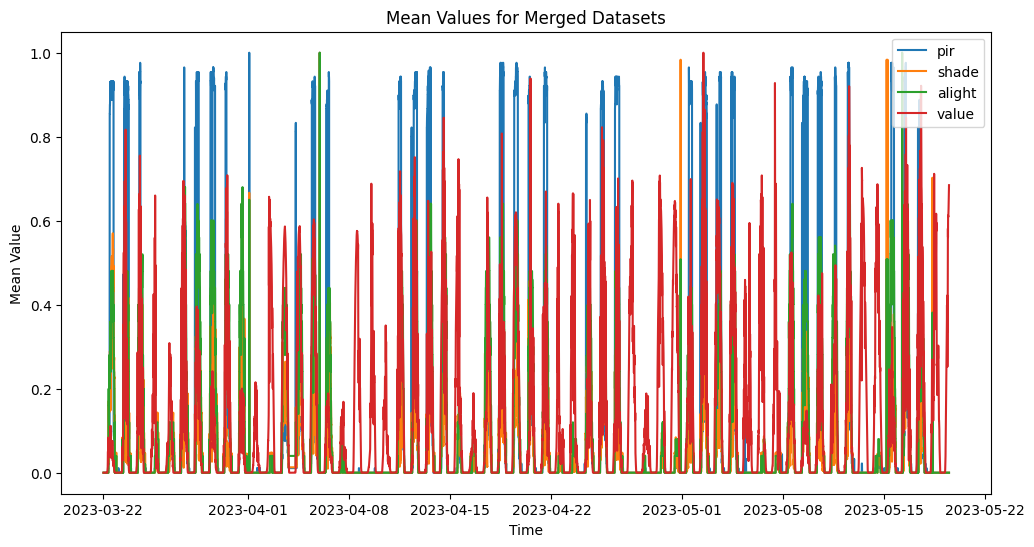

In [26]:
file_pattern = '*.csv'

file_paths = glob.glob(os.path.join(directory_path, file_pattern))

merged_datasets = []
for file_path in file_paths:
    df = pd.read_csv(file_path, parse_dates=['time'], index_col='time')
    merged_datasets.append(df)

merged = pd.concat(merged_datasets)
preGrouped = merged.groupby('time').mean()
grouped = minMaxnorm(preGrouped)

# Plot the mean values
plt.figure(figsize=(12, 6))

# Plotting for merged dataset
for column in grouped.columns:
    plt.plot(grouped.index, grouped[column], label=column)

# Set the title and labels
plt.title('Mean Values for Merged Datasets')
plt.xlabel('Time')
plt.ylabel('Mean Value')

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()

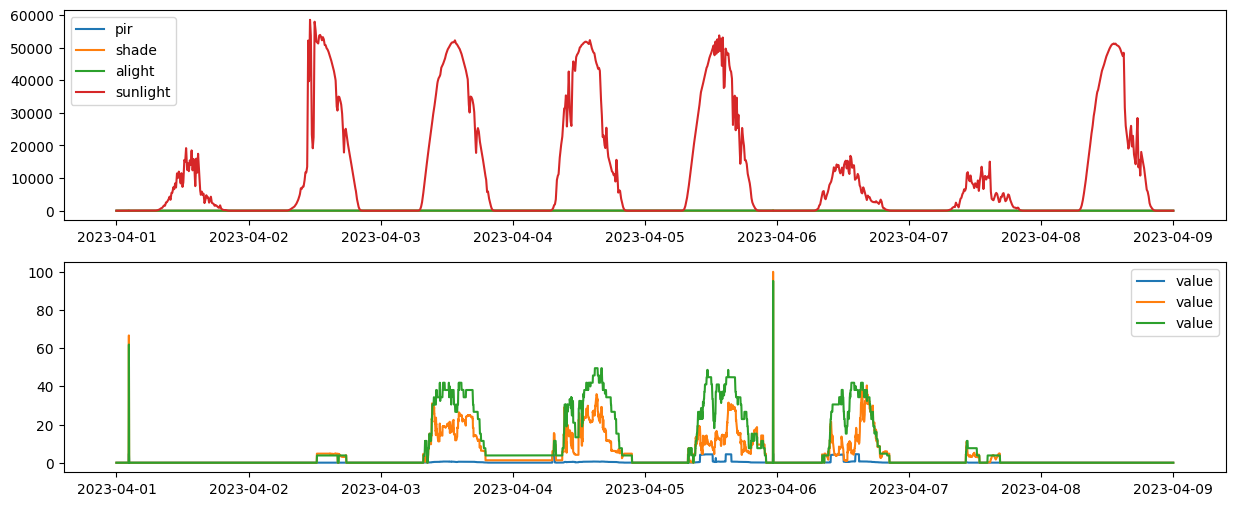

In [27]:
temp =preGrouped['2023-04-01':'2023-04-08'].drop(columns=['value'])
fig, ax = plt.subplots(2,1,figsize=(15, 6))
column1 = ['pir', 'shade', 'alight', 'sunlight']
ax[0].plot(preGrouped['2023-04-01':'2023-04-08'], label=column1)
ax[0].legend()
column2 = temp.columns
ax[1].plot(temp, label=column)
ax[1].legend()
plt.savefig('my_plot.png')

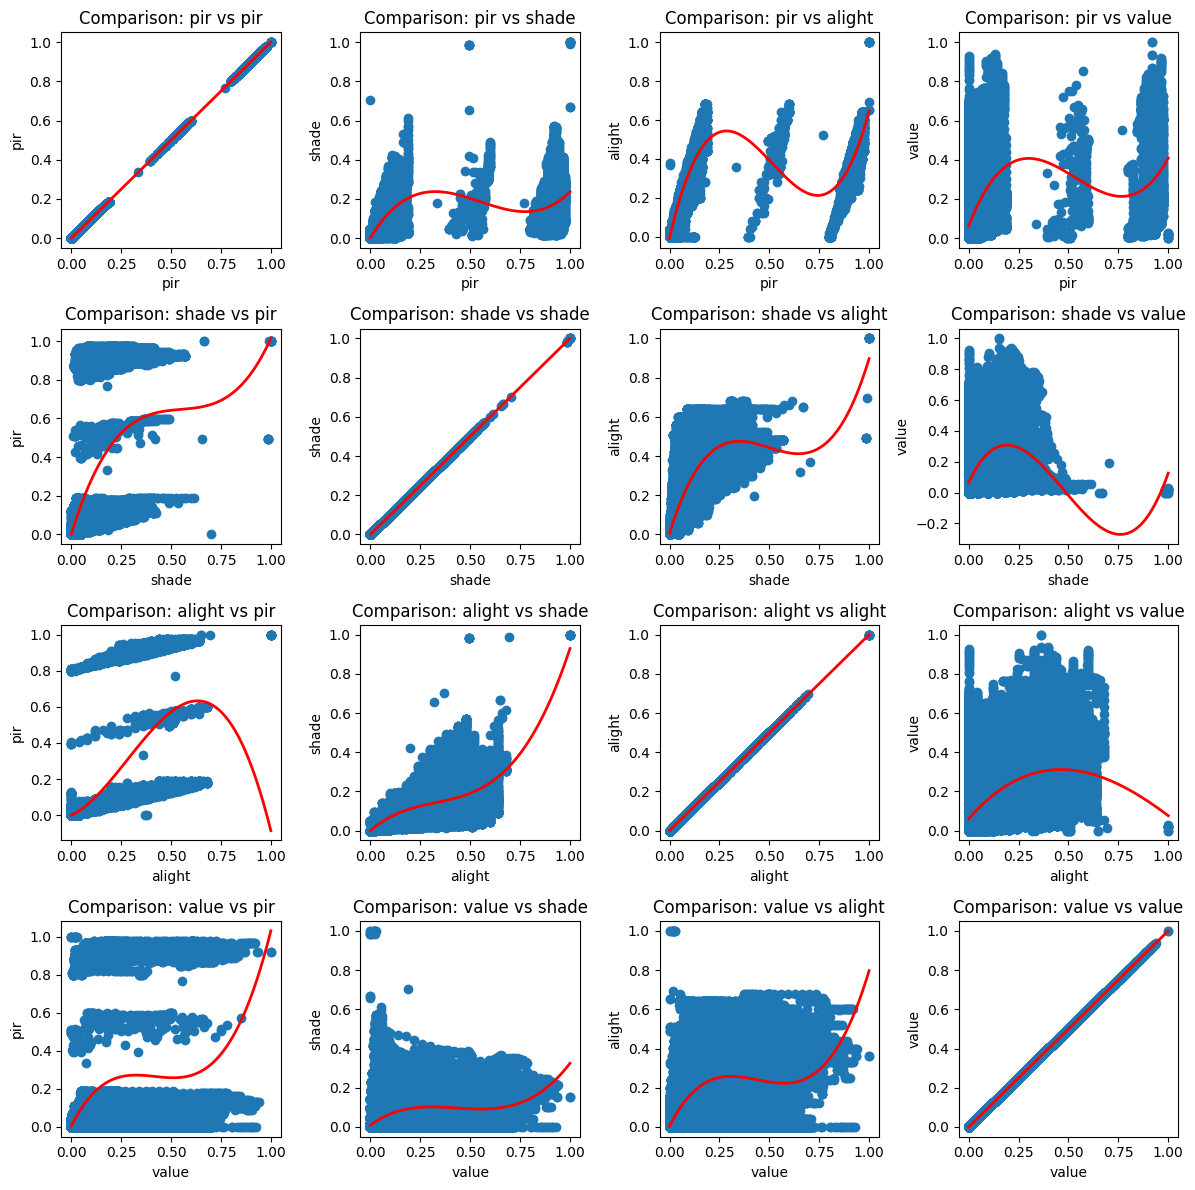

In [28]:
columns = grouped.columns
# Create subplots for column comparisons in Datasets 05
fig, axs = plt.subplots(len(columns), len(columns), figsize=(12, 12))

# Iterate over all combinations of columns
for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        axs[i, j].plot(grouped[col1], grouped[col2], 'o')

        # Perform polynomial regression
        degree = 3  # Set the degree of the polynomial
        X = grouped[col1].values.reshape(-1, 1)
        y = grouped[col2].values.reshape(-1, 1)

        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(X)

        # Fit the polynomial regression model
        model = LinearRegression()
        model.fit(X_poly, y)

        # Predict the values using the polynomial regression model
        X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        X_pred_poly = poly_features.transform(X_pred)
        y_pred = model.predict(X_pred_poly)

        # Plot the fitted curve
        axs[i, j].plot(X_pred, y_pred, color='red', linewidth=2)

        axs[i, j].set_title(f'Comparison: {col1} vs {col2}')
        axs[i, j].set_xlabel(col1)
        axs[i, j].set_ylabel(col2)

plt.tight_layout()

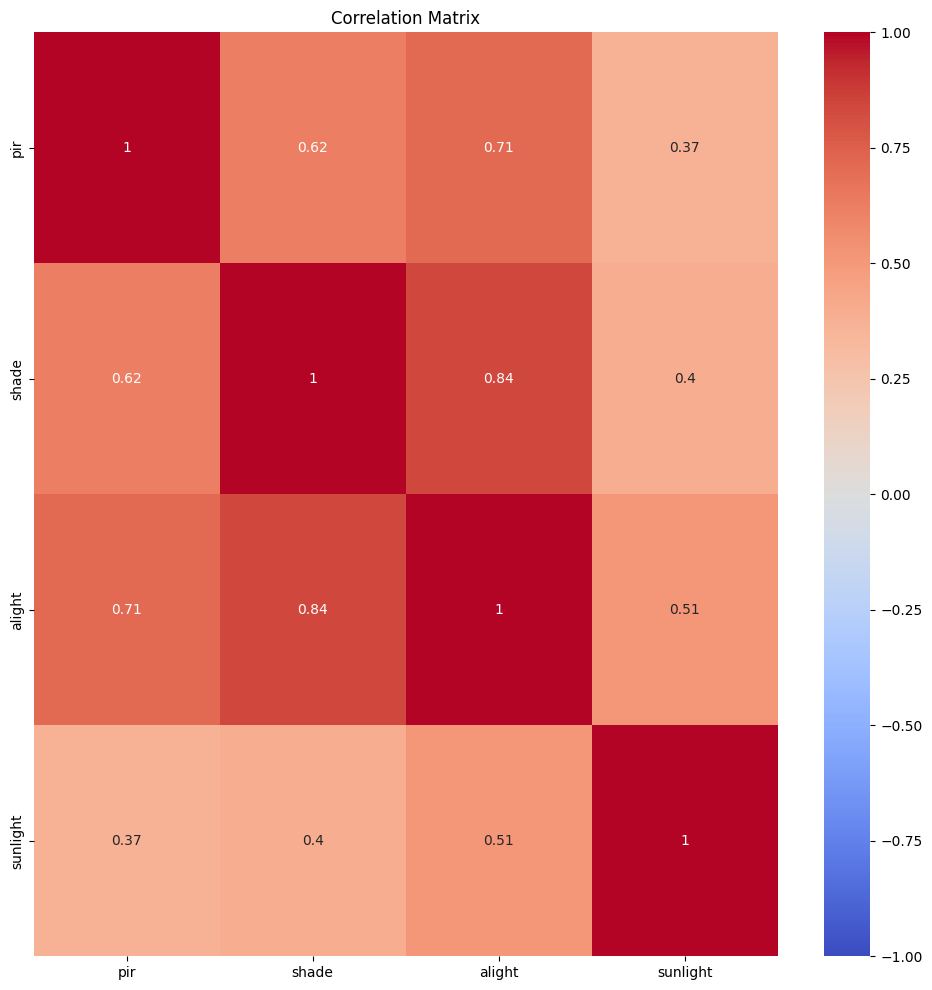

In [29]:
# Calculate the correlation matrix
corr_matrix = grouped.rename(columns={'value':'sunlight'}).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

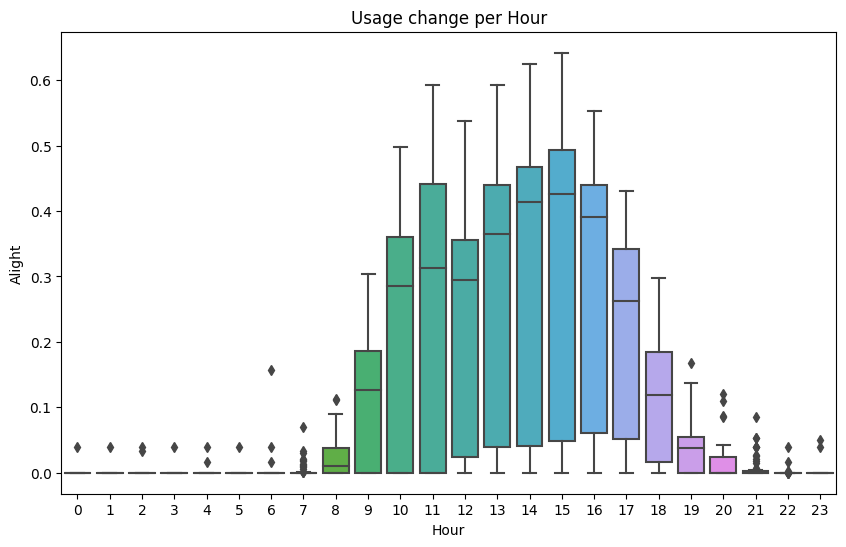

In [30]:
grouped_hourly = grouped.resample('H').mean()

# Extract the hour component from the index
grouped_hourly['hour'] = grouped_hourly.index.hour

data_per_hour = []

# Iterate over each hour
for hour in range(24):
    # Filter the data for the current hour
    data = grouped_hourly[grouped_hourly['hour'] == hour]['alight']
    data_per_hour.append(data)

fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn to create the boxplot
sns.boxplot(data=data_per_hour, ax=ax)

# Set the title and labels
ax.set_title('Usage change per Hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Alight')

# Set the x-axis tick labels
ax.set_xticklabels(range(24))
plt.savefig('light_chng.png', dpi = 240)
# Show the plot
plt.show()

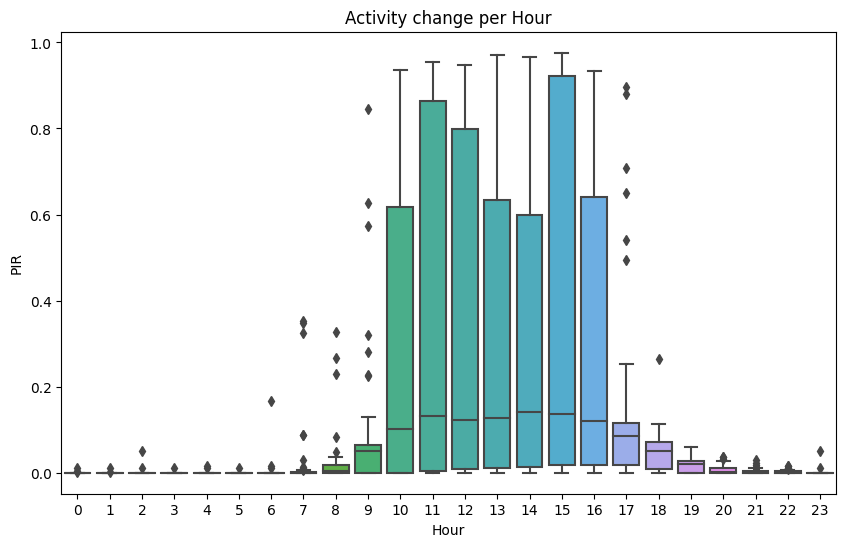

In [31]:
data_per_hour = []
# Iterate over each hour

for hour in range(24):
    # Filter the data for the current hour
    data = grouped_hourly[grouped_hourly['hour'] == hour]['pir']
    data_per_hour.append(data)

fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn to create the boxplot
sns.boxplot(data=data_per_hour, ax=ax)

# Set the title and labels
ax.set_title('Activity change per Hour')
ax.set_xlabel('Hour')
ax.set_ylabel('PIR')

# Set the x-axis tick labels
ax.set_xticklabels(range(24))
plt.savefig('act_change.png', dpi = 240)
# Show the plot
plt.show()

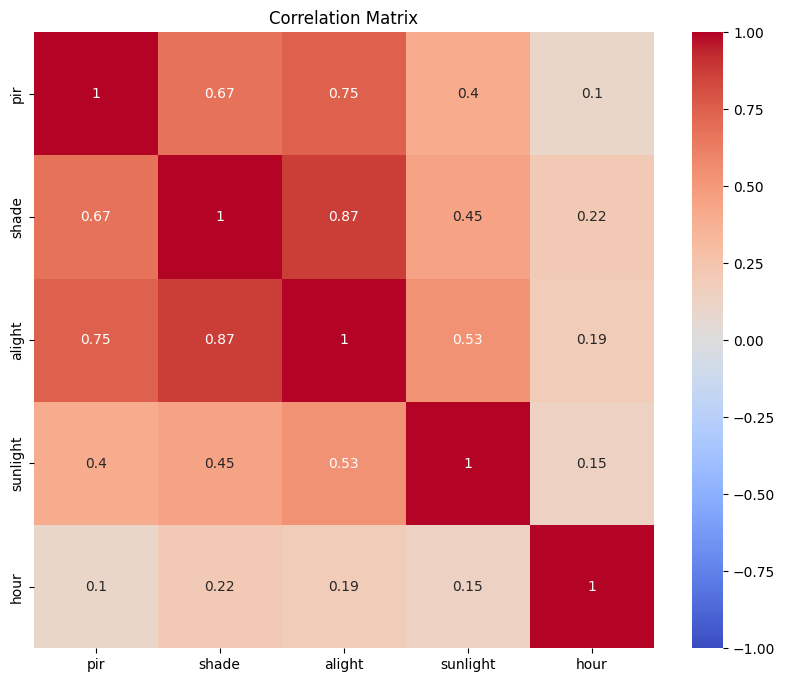

In [32]:
# Calculate the correlation matrix
corr_matrix = grouped_hourly.rename(columns={'value':'sunlight'}).corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Matrix')
plt.savefig('corrh.png', dpi = 240)
# Show the plot
plt.show()

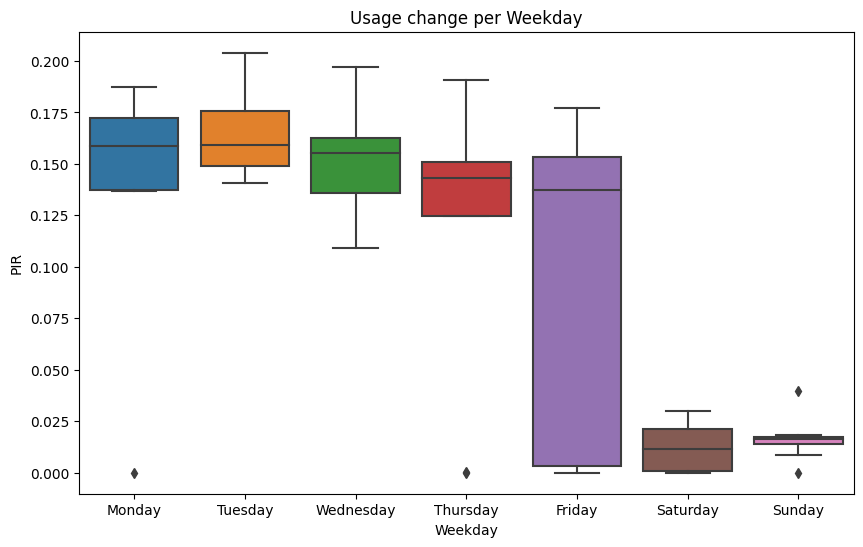

In [33]:
grouped_daily = grouped.resample('D').mean()

grouped_daily['weekday'] = grouped_daily.index.weekday
data_per_weekday = []

# Iterate over each weekday
for weekday in range(7):
    # Filter the data for the current weekday
    data = grouped_daily[grouped_daily['weekday'] == weekday]['alight']
    data_per_weekday.append(data)

# Create a single plot for all the boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn to create the boxplot
sns.boxplot(data=data_per_weekday, ax=ax)

# Set the title and labels
ax.set_title('Usage change per Weekday')
ax.set_xlabel('Weekday')
ax.set_ylabel('PIR')

# Set the x-axis tick labels
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticklabels(weekday_labels)
plt.savefig('light_chngwk.png', dpi = 240)
# Show the plot
plt.show()

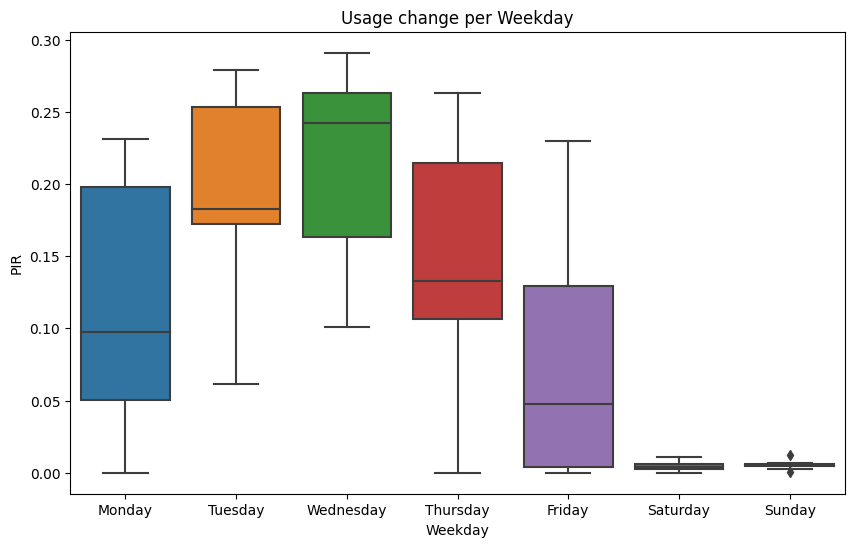

In [34]:
data_per_weekday = []

# Iterate over each weekday
for weekday in range(7):
    # Filter the data for the current weekday
    data = grouped_daily[grouped_daily['weekday'] == weekday]['pir']
    data_per_weekday.append(data)

# Create a single plot for all the boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn to create the boxplot
sns.boxplot(data=data_per_weekday, ax=ax)

# Set the title and labels
ax.set_title('Usage change per Weekday')
ax.set_xlabel('Weekday')
ax.set_ylabel('PIR')

# Set the x-axis tick labels
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticklabels(weekday_labels)
plt.savefig('act_chngwk.png', dpi = 240)
# Show the plot
plt.show()

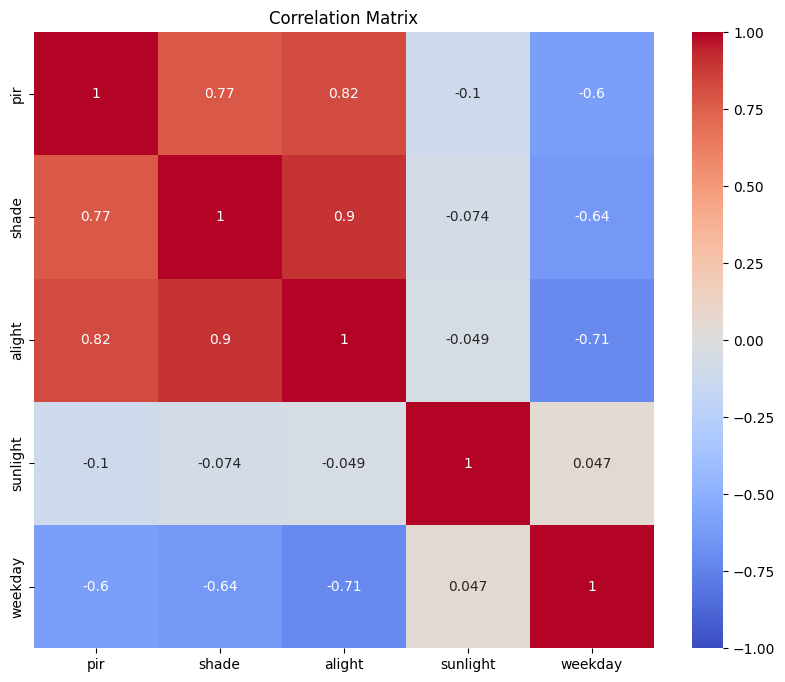

In [35]:
# Calculate the correlation matrix
corr_matrix = grouped_daily.rename(columns={'value':'sunlight'}).corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Matrix')
plt.savefig('corrdw.png', dpi = 240)
# Show the plot
plt.show()

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [37]:
grouped_hourly = grouped.resample('H').mean()

# Extract the hour component from the index
grouped_hourly['hour'] = grouped_hourly.index.hour

df_hourly_behavior = preGrouped['2023-04-04']
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(df_hourly_behavior)

# Standardization
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(df_hourly_behavior)

# Robust Scaling
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(df_hourly_behavior)


<ipython-input-37-43128b73b7b1>:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_hourly_behavior = preGrouped['2023-04-04']


<ipython-input-38-fad54a41aa93>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(preGrouped['2023-04-04'])


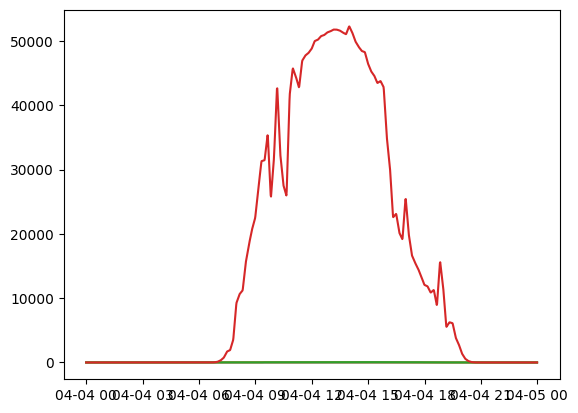

In [38]:
plt.plot(preGrouped['2023-04-04'])

In [39]:
prgrouped_hourly = preGrouped.resample('H').mean()

# Extract the hour component from the index
prgrouped_hourly['hour'] = prgrouped_hourly.index.hour

df_hourly_behaviorpr = prgrouped_hourly.groupby('hour').mean()

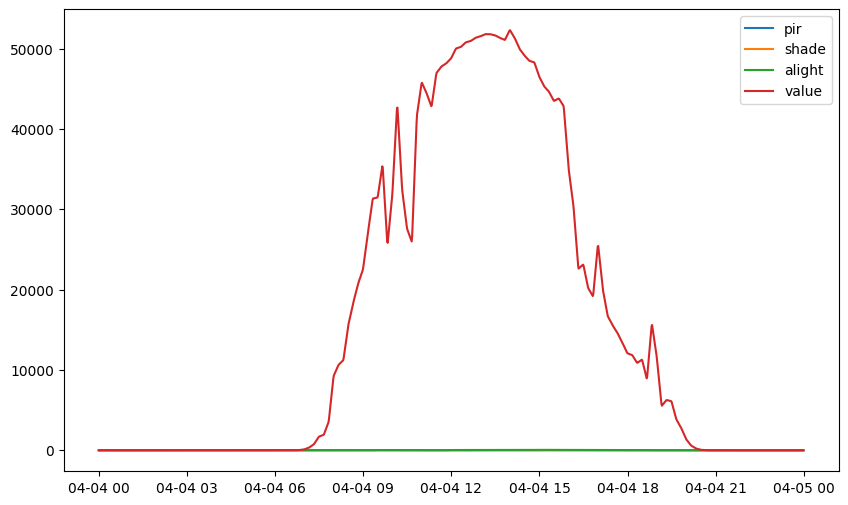

In [40]:
plt.figure(figsize=(10,6))
plt.plot(df_hourly_behavior, label=['pir', 'shade', 'alight', 'value'])
plt.legend()

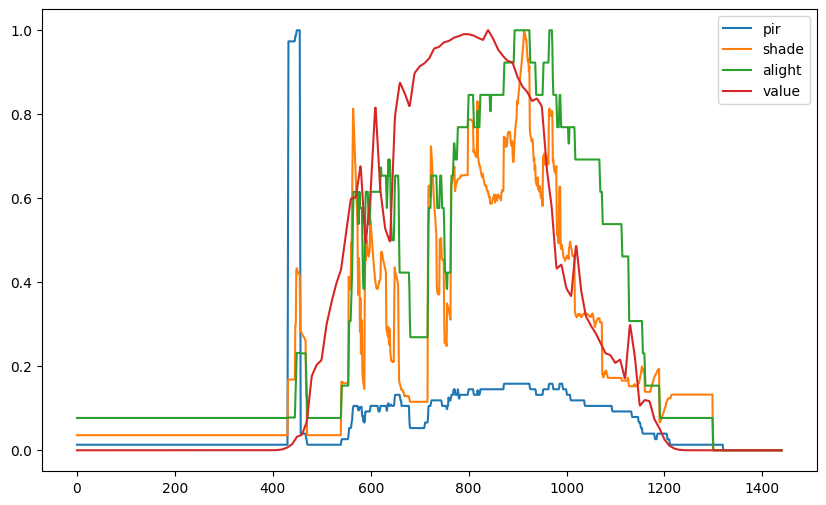

In [41]:
plt.figure(figsize=(10,6))
plt.plot(minmax_scaled_data, label=['pir', 'shade', 'alight', 'value'])
plt.legend()

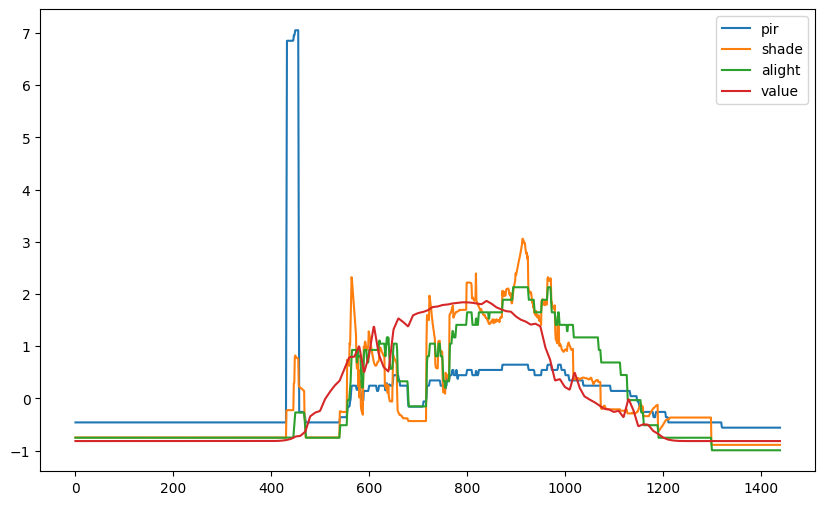

In [42]:
plt.figure(figsize=(10,6))
plt.plot(standard_scaled_data, label=['pir', 'shade', 'alight', 'value'])
plt.legend()

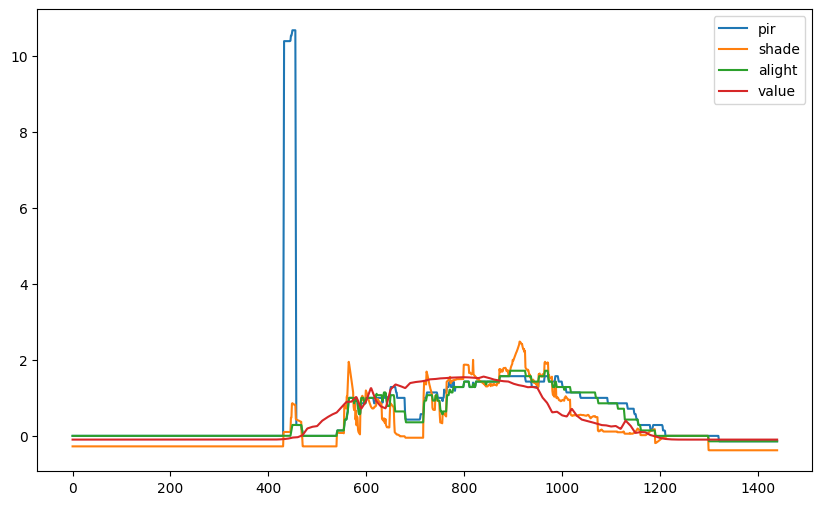

In [43]:
plt.figure(figsize=(10,6))
plt.plot(robust_scaled_data, label=['pir', 'shade', 'alight', 'value'])
plt.legend()

In [44]:
df_hourly_behaviorpr

pir      shade     alight         value
hour                                              
0     0.001365   0.021866   0.064568      0.215329
1     0.001007   0.021866   0.064568      0.215570
2     0.004923   0.078363   0.117030      0.213371
3     0.000888   0.021866   0.064568      0.212876
4     0.002233   0.050114   0.091472      0.227981
5     0.000888   0.021866   0.064568     26.411799
6     0.015685   0.316458   0.344364    858.628497
7     0.104547   0.434459   0.397215   4510.870538
8     0.111920   1.675408   2.195345  10957.831871
9     0.395174   6.288870  10.515462  18322.206001
10    1.378342   8.573455  20.131545  24932.072804
11    1.754565   8.338035  23.508152  30869.572245
12    1.591172   7.658933  21.468429  33041.737414
13    1.414242  10.130605  26.408757  33484.860136
14    1.614528  11.550828  29.219404  31642.627248
15    1.701154  15.274991  30.838964  25170.488445
16    1.383785  14.899396  27.564711  21173.498848
17    0.627071  10.551934  20.322991  16016.370907
18    0.225338   6.499201  10.919842  10836.917212
19    0.084436   3.033621   3.920824   5002.240979
20    0.032373   1.675238   1.522601   1147.050242
21    0.016354   0.831590   0.720416     57.332693
22    0.009476   0.055049   0.099115      0.326047
23    0.005008   0.108450   0.147783      0.202587

In [45]:
minmax_scaled_data

array([[1.32052823e-02, 3.59015096e-02, 7.69230769e-02, 5.46581979e-06],
       [1.32052823e-02, 3.59015096e-02, 7.69230769e-02, 5.46581979e-06],
       [1.32052823e-02, 3.59015096e-02, 7.69230769e-02, 5.46581979e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.46581979e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.46581979e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.46581979e-06]])

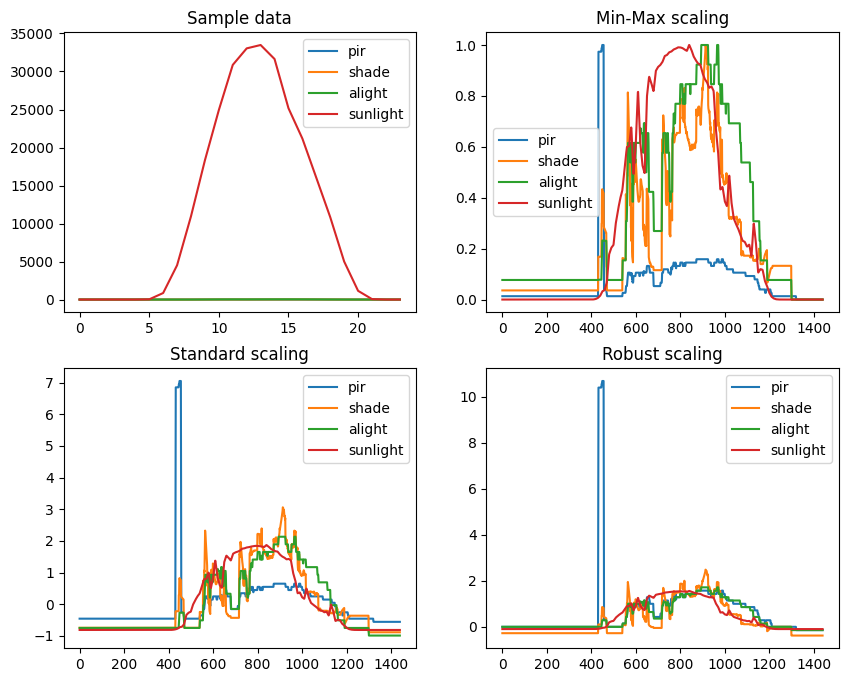

In [46]:
# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot data on the subplots
axs[0, 0].plot(df_hourly_behaviorpr, label=['pir', 'shade', 'alight', 'sunlight'])
axs[0, 0].legend()
axs[0, 0].set_title('Sample data')
axs[0, 1].plot(minmax_scaled_data, label=['pir', 'shade', 'alight', 'sunlight'])
axs[0, 1].legend()
axs[0, 1].set_title('Min-Max scaling')
axs[1, 0].plot(standard_scaled_data, label=['pir', 'shade', 'alight', 'sunlight'])
axs[1, 0].legend()
axs[1, 0].set_title('Standard scaling')
axs[1, 1].plot(robust_scaled_data, label=['pir', 'shade', 'alight', 'sunlight'])
axs[1, 1].legend()
axs[1, 1].set_title('Robust scaling')

plt.savefig('scaling.png', dpi = 240)

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [48]:
time_series_data = preGrouped

# # Scaling methods
# scaling_methods = {
#     'Min-Max Scaling': MinMaxScaler(),
#     'Standardization': StandardScaler(),
#     'Robust Scaling': RobustScaler()
# }

# # Define the range of number of clusters to evaluate
# max_clusters = 5

# # Metrics to evaluate
# metrics = {
#     'Elbow Method': 'elbow',
#     'Silhouette Score': silhouette_score,
#     'Davies-Bouldin Score': davies_bouldin_score,
#     'Calinski-Harabasz Score': calinski_harabasz_score
# }

# # Create subplots grid layout
# num_methods = len(scaling_methods)
# num_metrics = len(metrics)
# fig, axes = plt.subplots(num_methods, num_metrics, figsize=(15, 10))

# # Apply scaling, Elbow Method, and compute scores for each scaling method and metric
# for method_idx, (method_name, scaler) in enumerate(scaling_methods.items()):
#     # Scale the time series data
#     scaled_data = scaler.fit_transform(time_series_data)

#     for metric_idx, (metric_name, metric) in enumerate(metrics.items()):
#         ax = axes[method_idx, metric_idx]

#         if metric_name == 'Elbow Method':
#             # Apply Elbow Method
#             wcss = []
#             for n_clusters in range(1, max_clusters+1):
#                 # Initialize the k-means model
#                 kmeans = KMeans(n_clusters=n_clusters, random_state=42)

#                 # Fit the k-means model to the scaled data
#                 kmeans.fit(scaled_data)

#                 # Calculate the within-cluster sum of squares (WCSS)
#                 wcss.append(kmeans.inertia_)

#             # Plot the Elbow Method curve
#             ax.plot(range(1, max_clusters+1), wcss)
#             ax.set_xlabel('Number of Clusters')
#             ax.set_ylabel('WCSS')
#             ax.set_title(f'Elbow Method - {method_name}')

#         else:
#             # Compute the metric score
#             scores = []
#             for n_clusters in range(2, max_clusters+1):
#                 # Initialize the k-means model
#                 kmeans = KMeans(n_clusters=n_clusters, random_state=42)

#                 # Fit the k-means model to the scaled data
#                 kmeans.fit(scaled_data)

#                 # Compute the metric score
#                 score = metric(scaled_data, kmeans.labels_)
#                 scores.append(score)

#             # Plot the scores
#             ax.plot(range(2, max_clusters+1), scores)
#             ax.set_xlabel('Number of Clusters')
#             ax.set_ylabel(metric_name)
#             ax.set_title(f'{metric_name} - {method_name}')

# # Adjust subplot spacing
# plt.tight_layout()

# # Show the plot
# plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


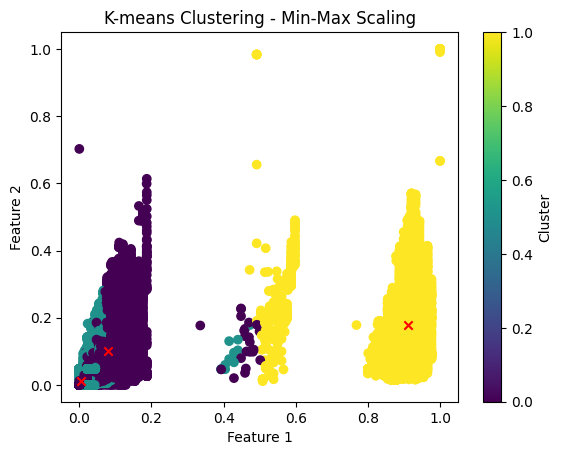

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


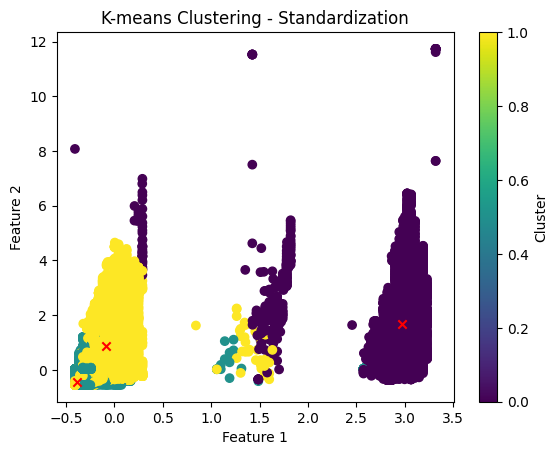

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


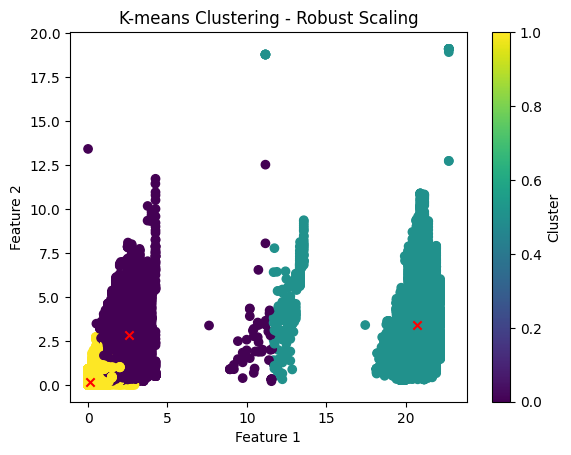

In [49]:
# Scaling methods
scaling_methods = {
    'Min-Max Scaling': MinMaxScaler(),
    'Standardization': StandardScaler(),
    'Robust Scaling': RobustScaler()
}

# Apply K-means clustering for each scaling method
for method_name, scaler in scaling_methods.items():
    # Scale the time series data
    scaled_data = scaler.fit_transform(time_series_data)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Plot the distribution of data based on clusters
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-means Clustering - {method_name}')
    plt.colorbar(label='Cluster')
    plt.show()

In [50]:
# Create a table to store the data distribution
data_distribution = pd.DataFrame(columns=['Method', 'Cluster', 'Data Points'])

# Apply K-means clustering for each scaling method
for method_name, scaler in scaling_methods.items():
    # Scale the time series data
    scaled_data = scaler.fit_transform(time_series_data)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Count the number of data points in each cluster
    cluster_counts = np.bincount(clusters)

    # Add the data distribution to the table
    for cluster, count in enumerate(cluster_counts):
        data_distribution = data_distribution.append({'Method': method_name, 'Cluster': cluster, 'Data Points': count}, ignore_index=True)

# Display the data distribution table
print(data_distribution)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-50-613831f279f4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_distribution = data_distribution.append({'Method': method_name, 'Cluster': cluster, 'Data Points': count}, ignore_index=True)
<ipython-input-50-613831f279f4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_distribution = data_distribution.append({'Method': method_name, 'Cluster': cluster, 'Data Points': count}, ignore_index=True)
<ipython-input-50-613831f279f4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

            Method Cluster Data Points
0  Min-Max Scaling       0       16841
1  Min-Max Scaling       1       59117
2  Min-Max Scaling       2        8273
3  Standardization       0        8255
4  Standardization       1       60200
5  Standardization       2       15776
6   Robust Scaling       0       11718
7   Robust Scaling       1        8255
8   Robust Scaling       2       64258


<ipython-input-50-613831f279f4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_distribution = data_distribution.append({'Method': method_name, 'Cluster': cluster, 'Data Points': count}, ignore_index=True)
<ipython-input-50-613831f279f4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_distribution = data_distribution.append({'Method': method_name, 'Cluster': cluster, 'Data Points': count}, ignore_index=True)
<ipython-input-50-613831f279f4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_distribution = data_distribution.append({'Method': method_name, 'Cluster': cluster, 'Data Points': count}, ignore_index=True)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


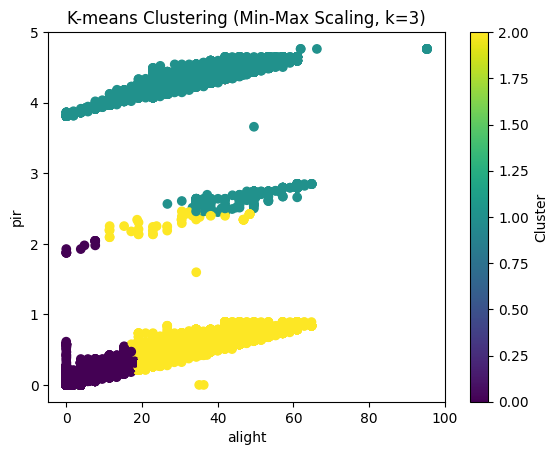

Cluster Statistics - Min-Max Scaling:
                            alight                                   \
                             count       mean        std        min   
Cluster (Min-Max Scaling)                                             
0                          64905.0   1.359158   3.229893   0.000000   
1                           8247.0  39.338966  11.157623   0.052381   
2                          11079.0  35.650981  10.208817  11.438175   

                                                                       \
                                 25%        50%        75%        max   
Cluster (Min-Max Scaling)                                               
0                           0.000000   0.000000   0.000000  18.126984   
1                          34.338095  41.957143  45.766667  95.238095   
2                          26.666667  34.338095  41.904762  64.761905   

                               pir                                          \
                  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


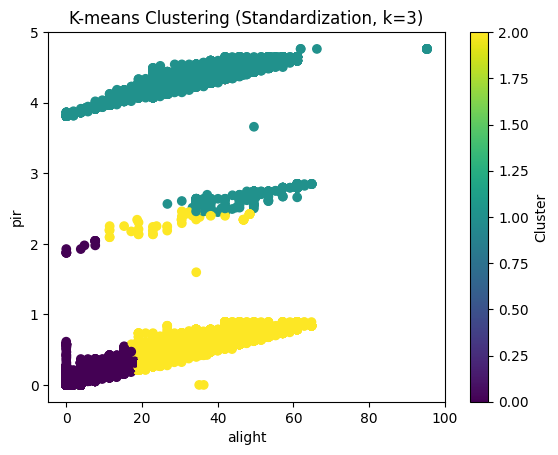

Cluster Statistics - Standardization:
                            alight                                   \
                             count       mean        std        min   
Cluster (Standardization)                                             
0                          64905.0   1.359158   3.229893   0.000000   
1                           8247.0  39.338966  11.157623   0.052381   
2                          11079.0  35.650981  10.208817  11.438175   

                                                                       \
                                 25%        50%        75%        max   
Cluster (Standardization)                                               
0                           0.000000   0.000000   0.000000  18.126984   
1                          34.338095  41.957143  45.766667  95.238095   
2                          26.666667  34.338095  41.904762  64.761905   

                               pir                                          \
                  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


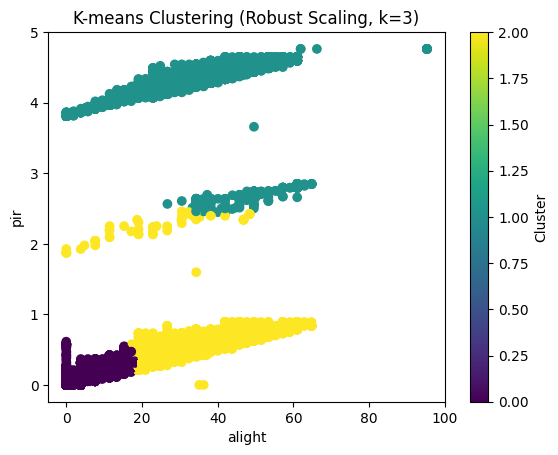

Cluster Statistics - Robust Scaling:
                           alight                                             \
                            count       mean        std       min        25%   
Cluster (Robust Scaling)                                                       
0                         64893.0   1.358683   3.229655  0.000000   0.000000   
1                          8247.0  39.338966  11.157623  0.052381  34.338095   
2                         11091.0  35.616656  10.257104  0.006111  26.666667   

                                                               pir            \
                                50%        75%        max    count      mean   
Cluster (Robust Scaling)                                                       
0                          0.000000   0.000000  18.126984  64893.0  0.027077   
1                         41.957143  45.766667  95.238095   8247.0  4.340121   
2                         34.338095  41.904762  64.761905  11091.0  0.558092   

 

In [51]:
column1 = time_series_data['alight']
column2 = time_series_data['pir']

# Combine the columns into a DataFrame
data = pd.DataFrame({'alight': column1, 'pir': column2})

# Perform K-means clustering for each scaling method
k = 3
for method_name, scaler in scaling_methods.items():
    # Scale the columns
    scaled_data = scaler.fit_transform(data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Add the cluster labels to the DataFrame
    data[f'Cluster ({method_name})'] = clusters

    # Plot the data points with cluster color coding
    plt.scatter(data['alight'], data['pir'], c=data[f'Cluster ({method_name})'], cmap='viridis')
    plt.xlabel('alight')
    plt.ylabel('pir')
    plt.title(f'K-means Clustering ({method_name}, k={k})')
    plt.colorbar(label='Cluster')
    plt.show()

    # Analyze each cluster
    cluster_stats = data.groupby(f'Cluster ({method_name})')[['alight', 'pir']].describe()
    print(f"Cluster Statistics - {method_name}:\n{cluster_stats}\n")

In [52]:
# column1 = time_series_data['alight']
# column2 = time_series_data['pir']

# # Combine the columns into a DataFrame
# data = pd.DataFrame({'alight': column1, 'pir': column2})

# # Perform K-means clustering for each scaling method
# k = 3
# for method_name, scaler in scaling_methods.items():
#     # Scale the columns
#     scaled_data = scaler.fit_transform(data)

#     # Perform K-means clustering
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     clusters = kmeans.fit_predict(scaled_data)

#     # Add the cluster labels to the DataFrame
#     data[f'Cluster ({method_name})'] = clusters

#     # Plot the data points with cluster color coding
#     plt.scatter(data['alight'], data['pir'], c=data[f'Cluster ({method_name})'], cmap='viridis')
#     plt.xlabel('alight')
#     plt.ylabel('pir')
#     plt.title(f'K-means Clustering ({method_name}, k={k})')
#     plt.colorbar(label='Cluster')
#     plt.show()

#     # Analyze each cluster
#     cluster_stats = data.groupby(f'Cluster ({method_name})')[['alight', 'pir']].describe()
#     print(f"Cluster Statistics - {method_name}:\n{cluster_stats}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


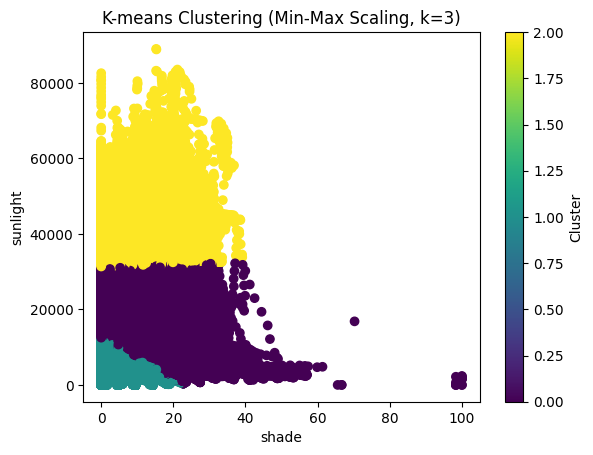

Cluster Statistics - Min-Max Scaling:
                             shade                                       \
                             count       mean        std  min       25%   
Cluster (Min-Max Scaling)                                                 
0                          19532.0  11.274804  10.656220  0.0  2.619048   
1                          53282.0   0.802681   2.575726  0.0  0.000000   
2                          11417.0  10.094906   9.477160  0.0  0.000000   

                                                              value  \
                                50%        75%         max    count   
Cluster (Min-Max Scaling)                                             
0                          9.194266  17.577755  100.000000  19532.0   
1                          0.000000   0.000000   22.742836  53282.0   
2                          8.344293  17.601066   39.105791  11417.0   

                                                                    \
              

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


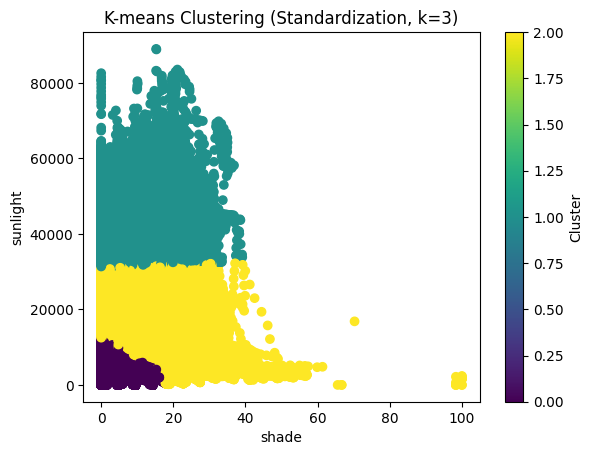

Cluster Statistics - Standardization:
                             shade                                       \
                             count       mean        std  min       25%   
Cluster (Standardization)                                                 
0                          53108.0   0.745870   2.379994  0.0  0.000000   
1                          11417.0  10.094906   9.477160  0.0  0.000000   
2                          19706.0  11.335444  10.628935  0.0  2.641608   

                                                              value  \
                                50%        75%         max    count   
Cluster (Standardization)                                             
0                          0.000000   0.000000   17.657304  53108.0   
1                          8.344293  17.601066   39.105791  11417.0   
2                          9.363050  17.719218  100.000000  19706.0   

                                                                    \
              

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


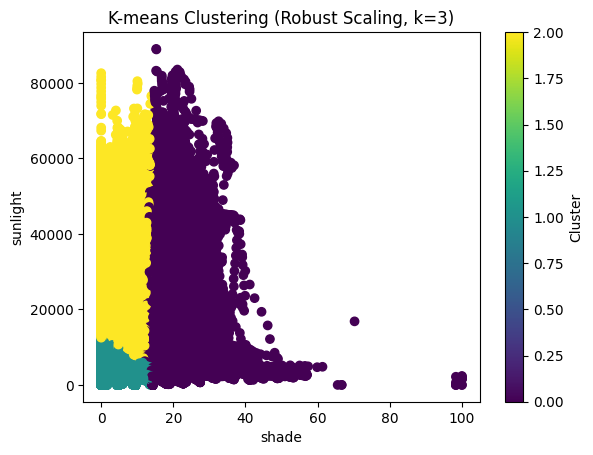

Cluster Statistics - Robust Scaling:
                            shade                                             \
                            count       mean       std        min        25%   
Cluster (Robust Scaling)                                                       
0                         12697.0  21.205776  7.492054  12.017951  15.811818   
1                         52572.0   0.603548  1.925237   0.000000   0.000000   
2                         18962.0   4.074570  4.148409   0.000000   0.000000   

                                                              value  \
                                50%        75%         max    count   
Cluster (Robust Scaling)                                              
0                         19.462489  24.556799  100.000000  12697.0   
1                          0.000000   0.000000   13.889584  52572.0   
2                          3.453300   7.326967   13.896499  18962.0   

                                                       

In [53]:
column1 = time_series_data['shade']
column2 = time_series_data['value']
scaling_methods = {
    'Min-Max Scaling': MinMaxScaler(),
    'Standardization': StandardScaler(),
    'Robust Scaling': RobustScaler()
}

# Combine the columns into a DataFrame
data = pd.DataFrame({'shade': column1, 'value': column2})

# Perform K-means clustering for each scaling method
k = 3
for method_name, scaler in scaling_methods.items():
    # Scale the columns
    scaled_data = scaler.fit_transform(data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Add the cluster labels to the DataFrame
    data[f'Cluster ({method_name})'] = clusters

    # Plot the data points with cluster color coding
    plt.scatter(data['shade'], data['value'], c=data[f'Cluster ({method_name})'], cmap='viridis')
    plt.xlabel('shade')
    plt.ylabel('sunlight')
    plt.title(f'K-means Clustering ({method_name}, k={k})')
    plt.colorbar(label='Cluster')
    plt.show()

    # Analyze each cluster
    cluster_stats = data.groupby(f'Cluster ({method_name})')[['shade', 'value']].describe()
    print(f"Cluster Statistics - {method_name}:\n{cluster_stats}\n")

In [54]:
from collections import defaultdict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


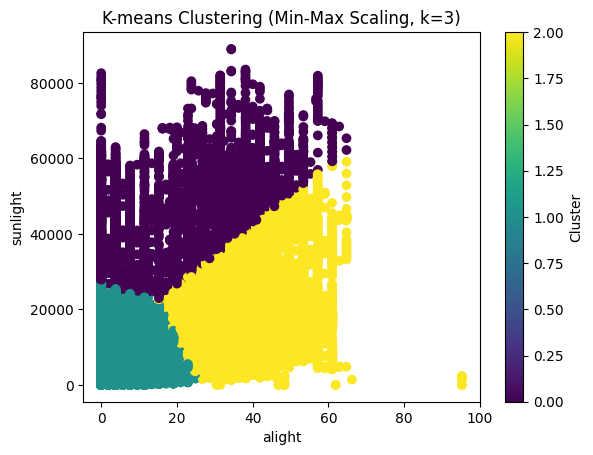

Cluster Statistics - Min-Max Scaling:
                            alight                                   \
                             count       mean        std        min   
Cluster (Min-Max Scaling)                                             
0                          10431.0  15.957463  17.101939   0.000000   
1                          59877.0   1.514648   3.828029   0.000000   
2                          13923.0  39.537236   9.797225  15.238095   

                                                                       \
                                 25%        50%        75%        max   
Cluster (Min-Max Scaling)                                               
0                           0.000000   7.619048  34.238095  64.761905   
1                           0.000000   0.000000   0.000000  24.846032   
2                          34.285714  38.147619  45.766667  95.238095   

                             value                                            \
                

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


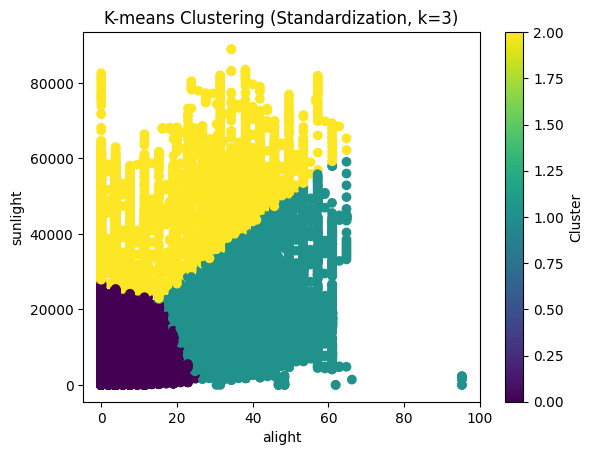

Cluster Statistics - Standardization:
                            alight                                   \
                             count       mean        std        min   
Cluster (Standardization)                                             
0                          59877.0   1.514648   3.828029   0.000000   
1                          13923.0  39.537236   9.797225  15.238095   
2                          10431.0  15.957463  17.101939   0.000000   

                                                                       \
                                 25%        50%        75%        max   
Cluster (Standardization)                                               
0                           0.000000   0.000000   0.000000  24.846032   
1                          34.285714  38.147619  45.766667  95.238095   
2                           0.000000   7.619048  34.238095  64.761905   

                             value                                            \
                

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


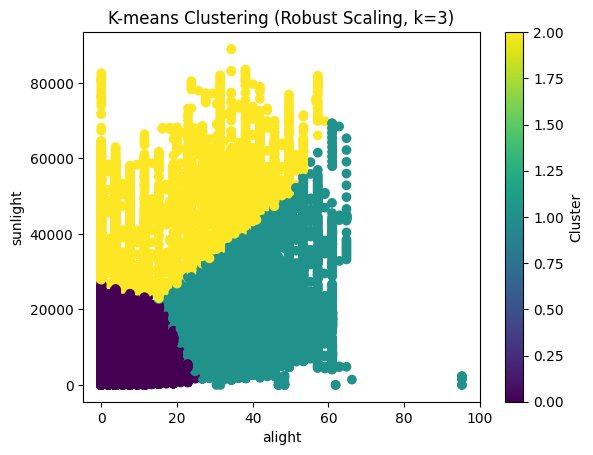

Cluster Statistics - Robust Scaling:
                           alight                                              \
                            count       mean        std        min        25%   
Cluster (Robust Scaling)                                                        
0                         59877.0   1.514648   3.828029   0.000000   0.000000   
1                         13959.0  39.585580   9.832740  15.238095  34.285714   
2                         10395.0  15.810883  16.947226   0.000000   0.000000   

                                                             value  \
                                50%        75%        max    count   
Cluster (Robust Scaling)                                             
0                          0.000000   0.000000  24.846032  59877.0   
1                         38.147619  45.766667  95.238095  13959.0   
2                          7.619048  33.385714  59.068254  10395.0   

                                                       

In [55]:
column1 = time_series_data['alight']
column2 = time_series_data['value']

# Scaling methods
scaling_methods = {
    'Min-Max Scaling': MinMaxScaler(),
    'Standardization': StandardScaler(),
    'Robust Scaling': RobustScaler()
}


# Combine the columns into a DataFrame
data = pd.DataFrame({'alight': column1, 'value': column2})

# Perform K-means clustering for each scaling method
k = 3
for method_name, scaler in scaling_methods.items():
    # Scale the columns
    scaled_data = scaler.fit_transform(data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Add the cluster labels to the DataFrame
    data[f'Cluster ({method_name})'] = clusters

    # Plot the data points with cluster color coding
    plt.scatter(data['alight'], data['value'], c=data[f'Cluster ({method_name})'], cmap='viridis')
    plt.xlabel('alight')
    plt.ylabel('sunlight')
    plt.title(f'K-means Clustering ({method_name}, k={k})')
    plt.colorbar(label='Cluster')
    plt.show()

    # Analyze each cluster
    cluster_stats = data.groupby(f'Cluster ({method_name})')[['alight', 'value']].describe()
    print(f"Cluster Statistics - {method_name}:\n{cluster_stats}\n")

In [56]:
# Perform K-means clustering for each scaling method
k = 3
cluster_indexes = {}
cluster_information = {}

# Select all columns from time_series_data
data = time_series_data[['alight', 'value']].copy()

for method_name, scaler in scaling_methods.items():
    # Scale the columns
    scaled_data = scaler.fit_transform(data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Add the cluster labels to the DataFrame
    data[f'Cluster ({method_name})'] = clusters

    # Get the data point indexes for each cluster
    cluster_indexes[method_name] = {}
    for cluster_label in range(k):
        cluster_indexes[method_name][cluster_label] = data.index[data[f'Cluster ({method_name})'] == cluster_label].tolist()

    # Get the cluster information
    cluster_information[method_name] = {}
    for cluster_label, indexes in cluster_indexes[method_name].items():
        cluster_information[method_name][cluster_label] = {'Indexes': indexes}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [60]:
cluster_indexes

{'Min-Max Scaling': {0: [Timestamp('2023-03-23 08:58:00'),
   Timestamp('2023-03-23 08:59:00'),
   Timestamp('2023-03-23 09:00:00'),
   Timestamp('2023-03-23 09:01:00'),
   Timestamp('2023-03-23 09:02:00'),
   Timestamp('2023-03-23 09:03:00'),
   Timestamp('2023-03-23 09:04:00'),
   Timestamp('2023-03-23 09:05:00'),
   Timestamp('2023-03-23 09:06:00'),
   Timestamp('2023-03-23 09:07:00'),
   Timestamp('2023-03-23 09:08:00'),
   Timestamp('2023-03-23 09:09:00'),
   Timestamp('2023-03-23 09:10:00'),
   Timestamp('2023-03-23 09:11:00'),
   Timestamp('2023-03-23 09:12:00'),
   Timestamp('2023-03-23 09:13:00'),
   Timestamp('2023-03-23 09:14:00'),
   Timestamp('2023-03-23 09:15:00'),
   Timestamp('2023-03-23 09:16:00'),
   Timestamp('2023-03-23 09:17:00'),
   Timestamp('2023-03-23 09:18:00'),
   Timestamp('2023-03-23 09:19:00'),
   Timestamp('2023-03-23 09:20:00'),
   Timestamp('2023-03-23 09:21:00'),
   Timestamp('2023-03-23 09:22:00'),
   Timestamp('2023-03-23 09:23:00'),
   Timestamp('20

In [61]:

# Dictionary to store the weekday counts
weekday_counts = defaultdict(set)

# Loop through the data
for scaling_method, scaling_clusters in cluster_indexes.items():
    for cluster, timestamps in scaling_clusters.items():
        weekday_set = set()

        for timestamp in timestamps:
            weekday = timestamp.weekday()  # Get the weekday (Monday = 0, Sunday = 6)

            # Add the date to the weekday set
            weekday_set.add(timestamp.date())

        # Update the weekday counts
        weekday_counts[(scaling_method, cluster)].update(weekday_set)

# Calculate the count of unique dates for each weekday
weekday_unique_counts = {
    (scaling_method, cluster, weekday): len(date_set)
    for (scaling_method, cluster), date_set in weekday_counts.items()
    for weekday in range(7)
}

# Sort the weekday_unique_counts dictionary by scaling method, cluster, and then weekday
sorted_weekday_counts = sorted(
    weekday_unique_counts.items(),
    key=lambda x: (x[0][0], x[0][1], x[0][2])
)

# Display the weekday distribution
for (scaling_method, cluster, weekday), count in sorted_weekday_counts:
    weekday_name = datetime.date(2000, 1, weekday + 1).strftime("%A")  # Convert weekday number to weekday name
    print(f"{scaling_method}, Cluster {cluster}, Weekday {weekday_name}: {count}")

Min-Max Scaling, Cluster 0, Weekday Saturday: 48
Min-Max Scaling, Cluster 0, Weekday Sunday: 48
Min-Max Scaling, Cluster 0, Weekday Monday: 48
Min-Max Scaling, Cluster 0, Weekday Tuesday: 48
Min-Max Scaling, Cluster 0, Weekday Wednesday: 48
Min-Max Scaling, Cluster 0, Weekday Thursday: 48
Min-Max Scaling, Cluster 0, Weekday Friday: 48
Min-Max Scaling, Cluster 1, Weekday Saturday: 59
Min-Max Scaling, Cluster 1, Weekday Sunday: 59
Min-Max Scaling, Cluster 1, Weekday Monday: 59
Min-Max Scaling, Cluster 1, Weekday Tuesday: 59
Min-Max Scaling, Cluster 1, Weekday Wednesday: 59
Min-Max Scaling, Cluster 1, Weekday Thursday: 59
Min-Max Scaling, Cluster 1, Weekday Friday: 59
Min-Max Scaling, Cluster 2, Weekday Saturday: 39
Min-Max Scaling, Cluster 2, Weekday Sunday: 39
Min-Max Scaling, Cluster 2, Weekday Monday: 39
Min-Max Scaling, Cluster 2, Weekday Tuesday: 39
Min-Max Scaling, Cluster 2, Weekday Wednesday: 39
Min-Max Scaling, Cluster 2, Weekday Thursday: 39
Min-Max Scaling, Cluster 2, Weekday 

In [62]:
# Extract the timestamps for cluster number 2
timestamps = cluster_indexes['Min-Max Scaling'][2]

# Get the unique dates
unique_dates = set(timestamp.date() for timestamp in timestamps)

# Print the unique dates
for date in sorted(unique_dates):
    print(date)


2023-03-22
2023-03-23
2023-03-24
2023-03-27
2023-03-28
2023-03-29
2023-03-30
2023-03-31
2023-04-01
2023-04-03
2023-04-04
2023-04-05
2023-04-06
2023-04-11
2023-04-12
2023-04-13
2023-04-14
2023-04-17
2023-04-18
2023-04-19
2023-04-20
2023-04-21
2023-04-24
2023-04-25
2023-04-26
2023-04-30
2023-05-01
2023-05-02
2023-05-03
2023-05-04
2023-05-08
2023-05-09
2023-05-10
2023-05-11
2023-05-12
2023-05-15
2023-05-16
2023-05-17
2023-05-18


In [63]:
# Extract the timestamps for cluster number 2
timestamps = cluster_indexes['Min-Max Scaling'][2]

# Get the unique dates
unique_dates = set(timestamp.date() for timestamp in timestamps)

# Create a dictionary to store the weekday counts
weekday_counts = defaultdict(int)

# Count the occurrences of each weekday from the unique dates
for date in unique_dates:
    weekday = date.weekday()  # Get the weekday (Monday = 0, Sunday = 6)
    weekday_counts[weekday] += 1

# Display the weekday counts
for weekday in range(7):
    weekday_name = datetime.date(2000, 1, weekday + 1).strftime("%A")  # Convert weekday number to weekday name
    count = weekday_counts[weekday]
    print(f"Weekday {weekday_name}: {count}")

Weekday Saturday: 7
Weekday Sunday: 8
Weekday Monday: 9
Weekday Tuesday: 8
Weekday Wednesday: 5
Weekday Thursday: 1
Weekday Friday: 1


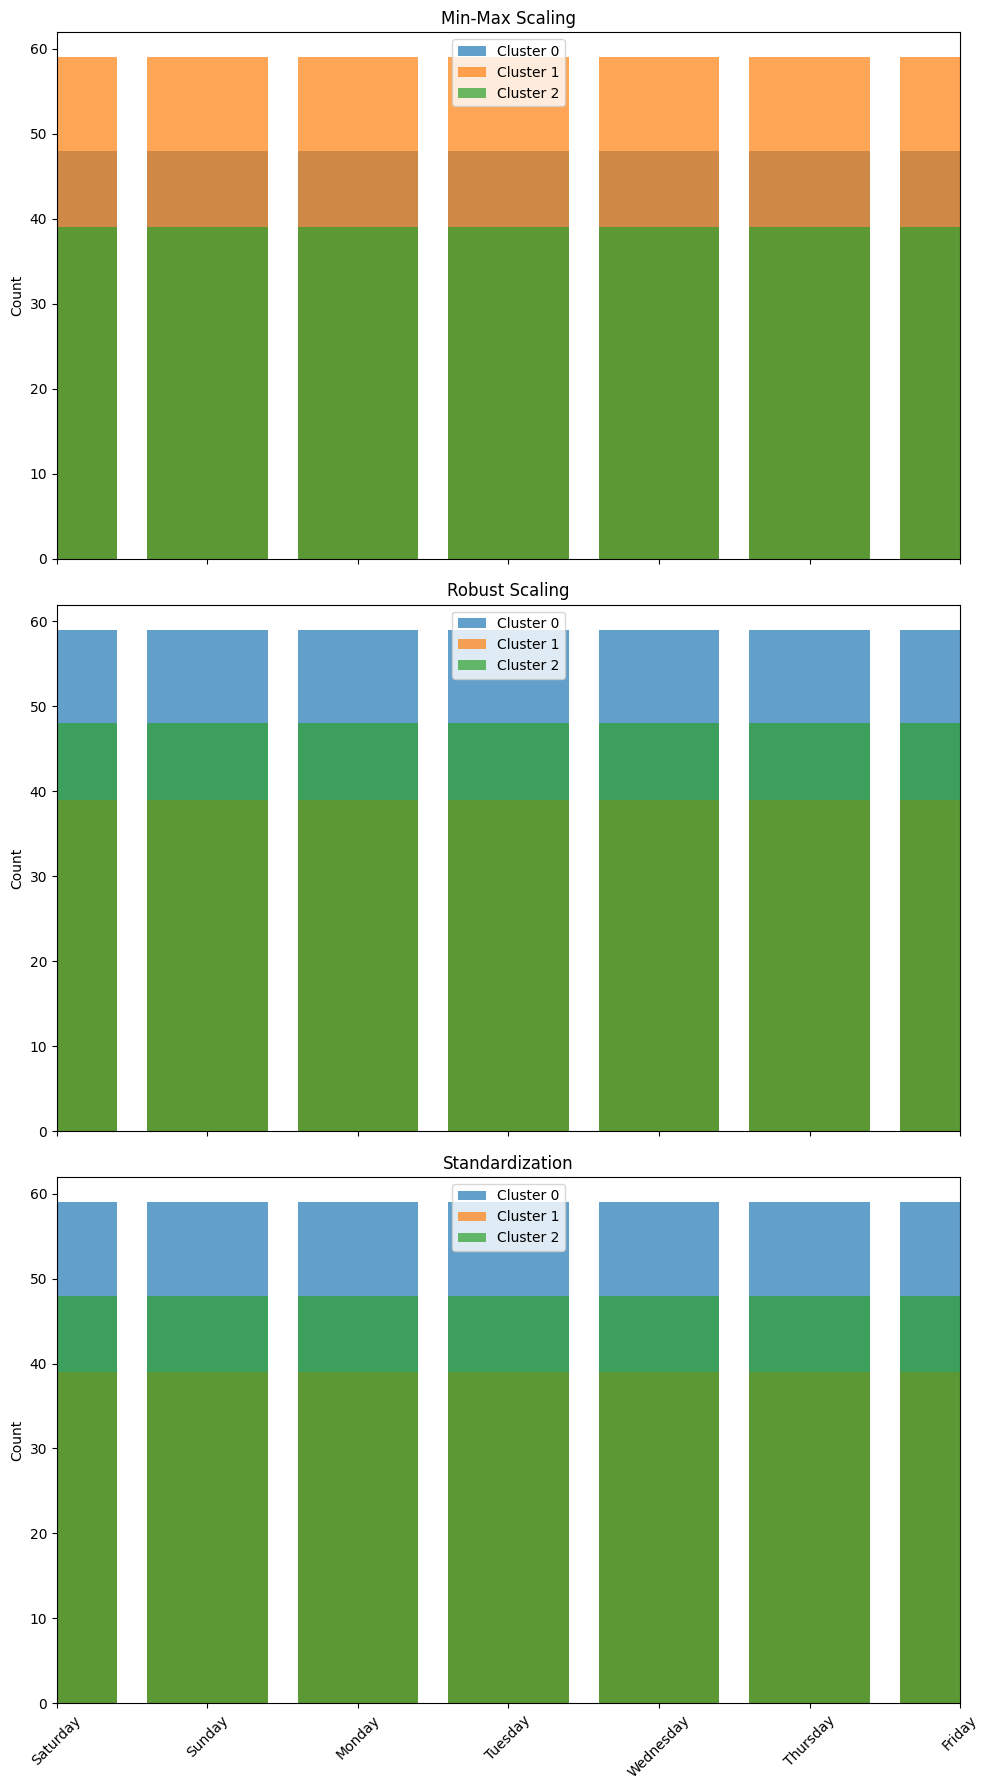

In [64]:

# Extract the unique scaling methods, clusters, and weekdays
scaling_methods = sorted(set([item[0][0] for item in sorted_weekday_counts]))
clusters = sorted(set([item[0][1] for item in sorted_weekday_counts]))
weekdays = sorted(set([item[0][2] for item in sorted_weekday_counts]))

# Create a colormap for different clusters
cmap = plt.get_cmap('tab10')

# Create subplots for each scaling method
fig, axs = plt.subplots(len(scaling_methods), 1, figsize=(10, 6 * len(scaling_methods)), sharex=True)

# Iterate over the scaling methods and create a subplot for each
for i, scaling_method in enumerate(scaling_methods):
    # Filter the sorted weekday counts based on the current scaling method
    method_counts = [(item[0][1], item[0][2], item[1]) for item in sorted_weekday_counts if item[0][0] == scaling_method]

    # Initialize an array to store the counts for each cluster and weekday
    cluster_counts = np.zeros((len(clusters), len(weekdays)))

    # Populate the cluster_counts array
    for cluster, weekday, count in method_counts:
        cluster_index = clusters.index(cluster)
        weekday_index = weekdays.index(weekday)
        cluster_counts[cluster_index, weekday_index] = count

    # Plot the bar chart for the current scaling method
    for j in range(len(clusters)):
        axs[i].bar(weekdays, cluster_counts[j], color=cmap(j), alpha=0.7)

    # Set the x-axis limits and labels
    axs[i].set_xlim(0, 6)  # Assuming weekdays range from Monday (0) to Sunday (6)
    axs[i].set_xticks(weekdays)
    axs[i].set_xticklabels([datetime.date(2000, 1, weekday + 1).strftime("%A") for weekday in weekdays], rotation=45)  # Convert weekday number to weekday name

    # Set the y-axis label
    axs[i].set_ylabel('Count')

    # Set the title
    axs[i].set_title(scaling_method)

    # Add a legend for the clusters
    legend_labels = [f'Cluster {cluster}' for cluster in clusters]
    axs[i].legend(legend_labels)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [65]:
# Dictionary to store the hour counts
hour_counts = defaultdict(int)

# Loop through the data
for scaling_method, scaling_clusters in cluster_indexes.items():
    for cluster, timestamps in scaling_clusters.items():
        hour_day_set = set()

        for timestamp in timestamps:
            hour = timestamp.hour
            day = timestamp.date()

            # Add the hour and day combination to the set
            hour_day_set.add((hour, day))

        # Update the hour counts
        for hour_day in hour_day_set:
            hour_counts[(scaling_method, cluster, hour_day[0])] += 1

# Sort the hour_counts dictionary by scaling method, cluster, and then hour
sorted_hour_counts = sorted(
    hour_counts.items(),
    key=lambda x: (x[0][0], x[0][1], x[0][2])
)

# Display the hour distribution
for (scaling_method, cluster, hour), count in sorted_hour_counts:
    print(f"{scaling_method}, Cluster {cluster}, Hour {hour}: {count}")

Min-Max Scaling, Cluster 0, Hour 8: 15
Min-Max Scaling, Cluster 0, Hour 9: 31
Min-Max Scaling, Cluster 0, Hour 10: 33
Min-Max Scaling, Cluster 0, Hour 11: 36
Min-Max Scaling, Cluster 0, Hour 12: 40
Min-Max Scaling, Cluster 0, Hour 13: 38
Min-Max Scaling, Cluster 0, Hour 14: 35
Min-Max Scaling, Cluster 0, Hour 15: 26
Min-Max Scaling, Cluster 0, Hour 16: 19
Min-Max Scaling, Cluster 0, Hour 17: 15
Min-Max Scaling, Cluster 0, Hour 18: 7
Min-Max Scaling, Cluster 1, Hour 0: 59
Min-Max Scaling, Cluster 1, Hour 1: 59
Min-Max Scaling, Cluster 1, Hour 2: 59
Min-Max Scaling, Cluster 1, Hour 3: 59
Min-Max Scaling, Cluster 1, Hour 4: 59
Min-Max Scaling, Cluster 1, Hour 5: 59
Min-Max Scaling, Cluster 1, Hour 6: 59
Min-Max Scaling, Cluster 1, Hour 7: 59
Min-Max Scaling, Cluster 1, Hour 8: 59
Min-Max Scaling, Cluster 1, Hour 9: 48
Min-Max Scaling, Cluster 1, Hour 10: 25
Min-Max Scaling, Cluster 1, Hour 11: 17
Min-Max Scaling, Cluster 1, Hour 12: 18
Min-Max Scaling, Cluster 1, Hour 13: 14
Min-Max Scali

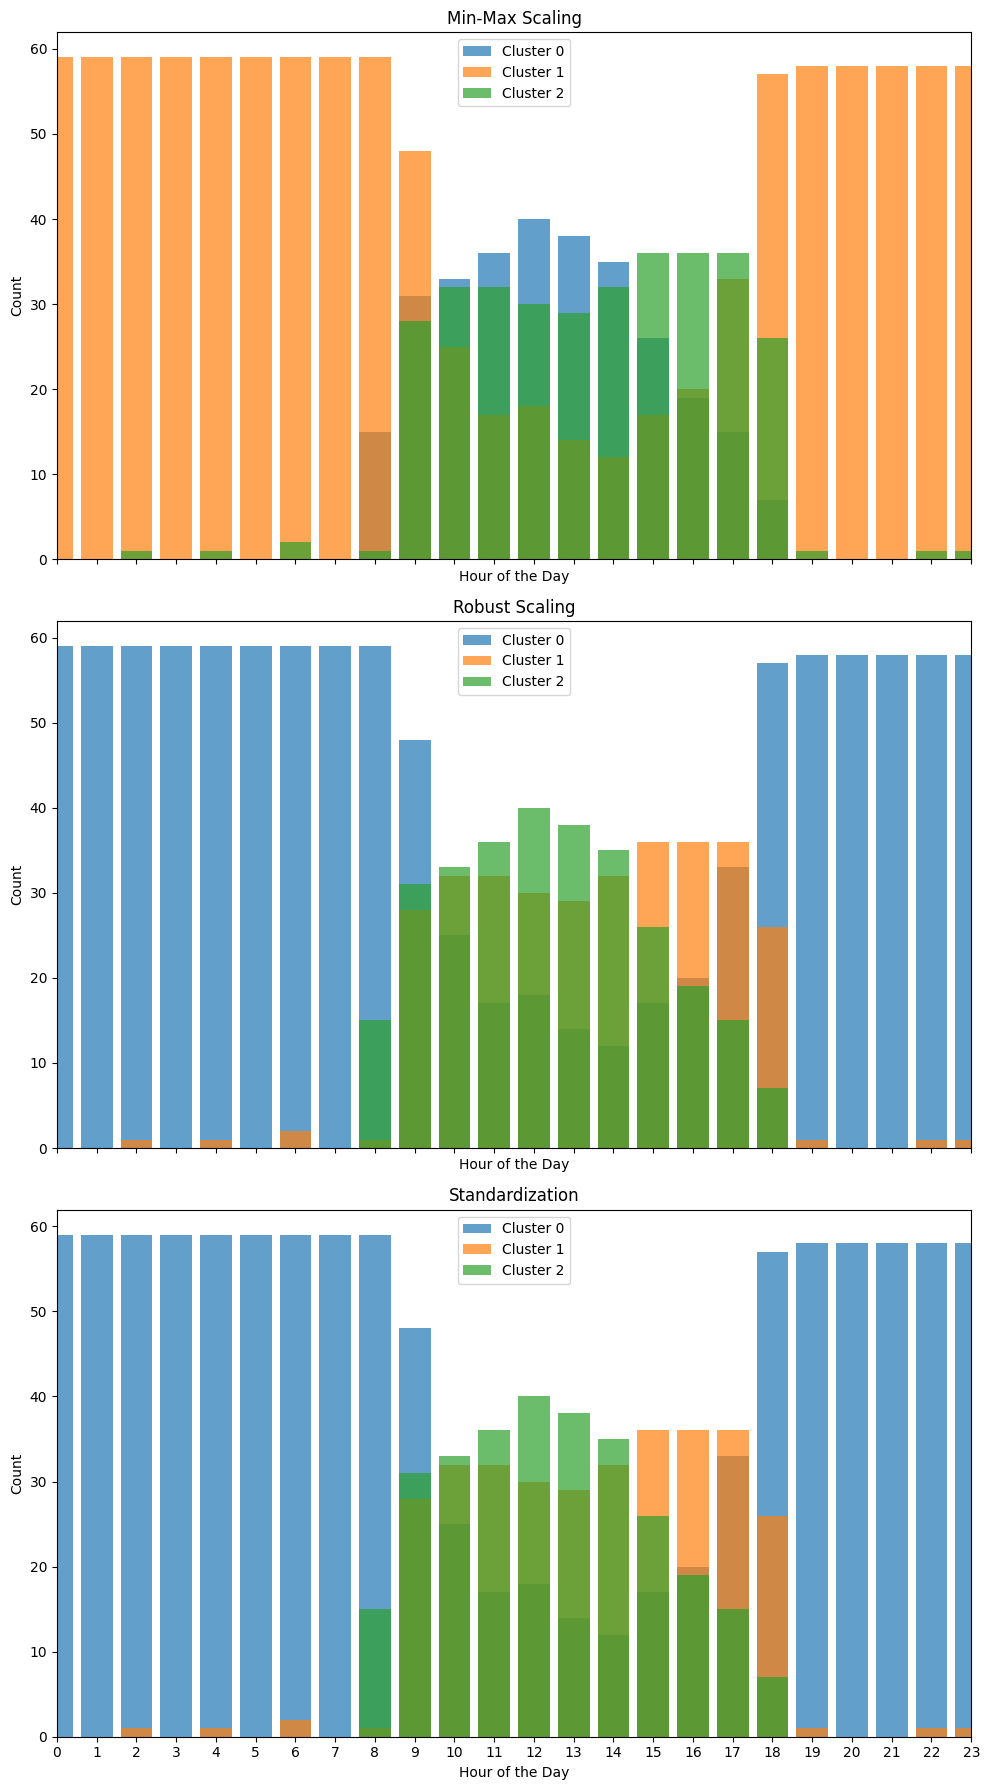

In [66]:
# Extract the unique scaling methods, clusters, and hours
scaling_methods = sorted(set([item[0][0] for item in sorted_hour_counts]))
clusters = sorted(set([item[0][1] for item in sorted_hour_counts]))
hours = sorted(set([item[0][2] for item in sorted_hour_counts]))

# Create a colormap for different clusters
cmap = plt.get_cmap('tab10')

# Create subplots for each scaling method
fig, axs = plt.subplots(len(scaling_methods), 1, figsize=(10, 6 * len(scaling_methods)), sharex=True)

# Iterate over the scaling methods and create a subplot for each
for i, scaling_method in enumerate(scaling_methods):
    # Filter the sorted hour counts based on the current scaling method
    method_counts = [(item[0][1], item[0][2], item[1]) for item in sorted_hour_counts if item[0][0] == scaling_method]

    # Initialize an array to store the counts for each cluster and hour
    cluster_counts = np.zeros((len(clusters), len(hours)))

    # Populate the cluster_counts array
    for cluster, hour, count in method_counts:
        cluster_index = clusters.index(cluster)
        hour_index = hours.index(hour)
        cluster_counts[cluster_index, hour_index] = count

    # Plot the histogram for the current scaling method
    for j in range(len(clusters)):
        axs[i].bar(hours, cluster_counts[j], color=cmap(j), alpha=0.7)

    # Set the x-axis limits and labels
    axs[i].set_xlim(0, 23)
    axs[i].set_xticks(hours)
    axs[i].set_xlabel('Hour of the Day')

    # Set the y-axis label
    axs[i].set_ylabel('Count')

    # Set the title
    axs[i].set_title(scaling_method)

    # Add a legend for the clusters
    legend_labels = [f'Cluster {cluster}' for cluster in clusters]
    axs[i].legend(legend_labels)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

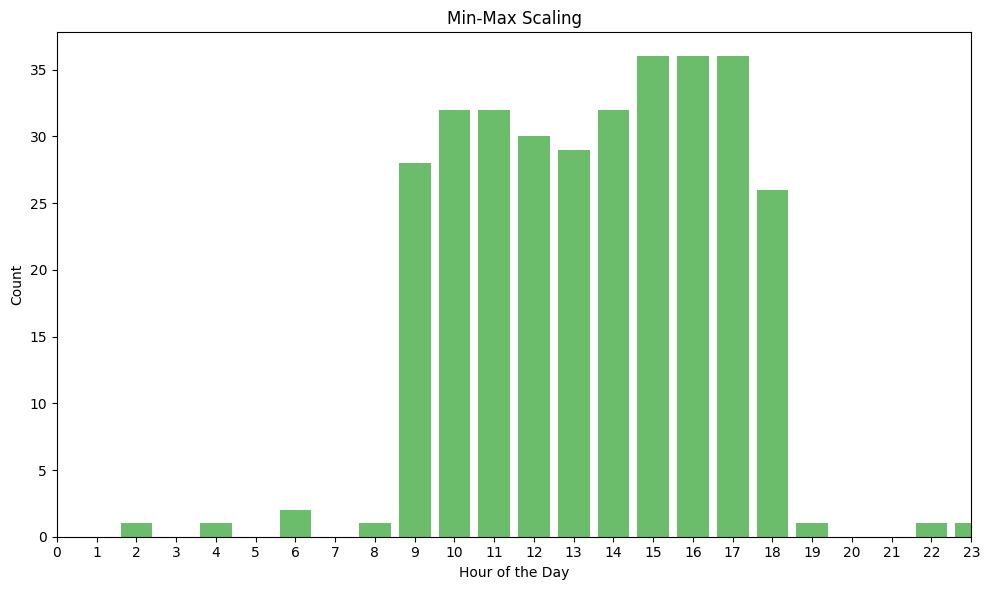

In [67]:
# Extract the unique scaling methods, clusters, and hours
scaling_methods = sorted(set([item[0][0] for item in sorted_hour_counts]))
clusters = sorted(set([item[0][1] for item in sorted_hour_counts]))
hours = sorted(set([item[0][2] for item in sorted_hour_counts]))

# Create a colormap for different clusters
cmap = plt.get_cmap('tab10')

# Create subplots for each scaling method
fig, axs = plt.subplots(1, 1, figsize=(10, 6), sharex=True)

# Filter the sorted hour counts based on the first scaling method and the last cluster
method_counts = [(item[0][1], item[0][2], item[1]) for item in sorted_hour_counts if item[0][0] == scaling_methods[0] and item[0][1] == clusters[-1]]

# Initialize an array to store the counts for each cluster and hour
cluster_counts = np.zeros((len(clusters), len(hours)))

# Populate the cluster_counts array
for cluster, hour, count in method_counts:
    cluster_index = clusters.index(cluster)
    hour_index = hours.index(hour)
    cluster_counts[cluster_index, hour_index] = count

# Plot the histogram for the first scaling method and the last cluster
axs.bar(hours, cluster_counts[-1], color=cmap(clusters[-1]), alpha=0.7)

# Set the x-axis limits and labels
axs.set_xlim(0, 23)
axs.set_xticks(hours)
axs.set_xlabel('Hour of the Day')

# Set the y-axis label
axs.set_ylabel('Count')

# Set the title
axs.set_title(scaling_methods[0])

# Add a legend for the clusters
legend_labels = [f'Cluster {cluster}' for cluster in clusters]

# Adjust the spacing
plt.tight_layout()
plt.savefig('hour_cut.png', dpi = 240)
# Show the plot
plt.show()


In [68]:
# Scaling methods
scaling_methods = {
    'Min-Max Scaling': MinMaxScaler(),
    'Standardization': StandardScaler(),
    'Robust Scaling': RobustScaler()
}

# Combine the columns into a DataFrame
column1 = time_series_data['alight']
column2 = time_series_data['value']
column3 = time_series_data['shade']
data = pd.DataFrame({'alight': column1, 'value': column2, 'shade': column3})

# Perform K-means clustering for each scaling method
k = 3
for method_name, scaler in scaling_methods.items():
    # Scale the columns
    scaled_data = scaler.fit_transform(data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Add the cluster labels to the DataFrame
    data[f'Cluster ({method_name})'] = clusters


    # Analyze each cluster
    cluster_stats = data.groupby(f'Cluster ({method_name})')[['alight', 'value', 'shade']].describe()
    print(f"Cluster Statistics - {method_name}:\n{cluster_stats}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Statistics - Min-Max Scaling:
                            alight                                   \
                             count       mean        std        min   
Cluster (Min-Max Scaling)                                             
0                          58829.0   1.507499   3.850064   0.000000   
1                          16707.0  39.528032   9.281614  15.238095   
2                           8695.0   6.732874  10.054779   0.000000   

                                                                       \
                                 25%        50%        75%        max   
Cluster (Min-Max Scaling)                                               
0                           0.000000   0.000000   0.000000  31.468254   
1                          34.285714  38.147619  45.766667  95.238095   
2                           0.000000   3.809524   7.619048  43.893651   

                             value                ...                \
                         

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Statistics - Standardization:
                            alight                                             \
                             count       mean       std        min        25%   
Cluster (Standardization)                                                       
0                          58631.0   1.454781  3.749849   0.000000   0.000000   
1                          16949.0  39.259018  9.523935  13.301587  34.285714   
2                           8651.0   6.580216  9.847142   0.000000   0.000000   

                                                              value  \
                                 50%        75%        max    count   
Cluster (Standardization)                                             
0                           0.000000   0.000000  31.468254  58631.0   
1                          38.147619  45.766667  95.238095  16949.0   
2                           3.809524   7.619048  43.893651   8651.0   

                                         ...    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Statistics - Robust Scaling:
                           alight                                             \
                            count       mean        std       min        25%   
Cluster (Robust Scaling)                                                       
0                         58132.0   1.329985   3.514018  0.000000   0.000000   
1                         17508.0  38.663652  10.055049  9.544444  32.412698   
2                          8591.0   6.213936   9.202089  0.000000   0.000000   

                                                             value  \
                                50%        75%        max    count   
Cluster (Robust Scaling)                                             
0                          0.000000   0.000000  31.468254  58132.0   
1                         38.147619  45.766667  95.238095  17508.0   
2                          3.809524   7.619048  38.147619   8591.0   

                                        ...                  

In [69]:
# Perform K-means clustering for each scaling method
k = 3
cluster_indexes = {}
cluster_information = {}

scaling_methods = {
    'Min-Max Scaling': MinMaxScaler(),
    'Standardization': StandardScaler(),
    'Robust Scaling': RobustScaler()
}


# Select all columns from time_series_data
data = time_series_data[['alight', 'value', 'shade']].copy()

for method_name, scaler in scaling_methods.items():
    # Scale the columns
    scaled_data = scaler.fit_transform(data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Add the cluster labels to the DataFrame
    data[f'Cluster ({method_name})'] = clusters

    # Get the data point indexes for each cluster
    cluster_indexes[method_name] = {}
    for cluster_label in range(k):
        cluster_indexes[method_name][cluster_label] = data.index[data[f'Cluster ({method_name})'] == cluster_label].tolist()

    # Get the cluster information
    cluster_information[method_name] = {}
    for cluster_label, indexes in cluster_indexes[method_name].items():
        cluster_information[method_name][cluster_label] = {'Indexes': indexes}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [70]:
# Get the timestamps for cluster number 2
timestamps = cluster_indexes['Min-Max Scaling'][2]

# Create a dictionary to store the count for each hour
hour_counts = defaultdict(int)

# Iterate over the timestamps and count the occurrences for each hour
for timestamp in timestamps:
    hour = timestamp.hour
    hour_counts[hour] += 1

# Print the hour counts from 0 to 23
for hour in range(24):
    count = hour_counts[hour]
    print(f"Hour {hour}: {count}")

Hour 0: 0
Hour 1: 0
Hour 2: 0
Hour 3: 0
Hour 4: 0
Hour 5: 0
Hour 6: 0
Hour 7: 21
Hour 8: 514
Hour 9: 1119
Hour 10: 904
Hour 11: 1131
Hour 12: 1331
Hour 13: 1129
Hour 14: 831
Hour 15: 573
Hour 16: 443
Hour 17: 462
Hour 18: 236
Hour 19: 1
Hour 20: 0
Hour 21: 0
Hour 22: 0
Hour 23: 0


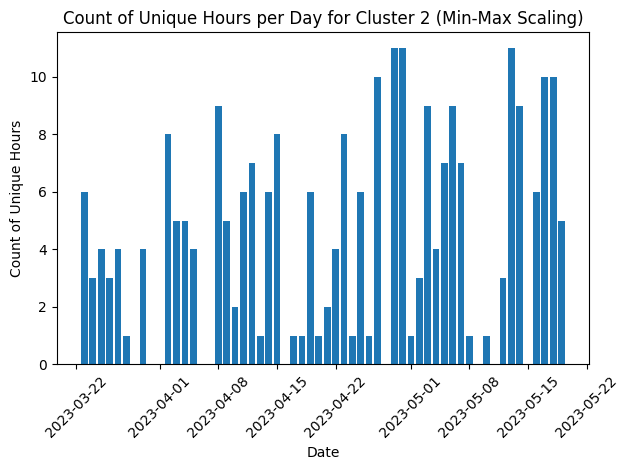

In [71]:
# Create a dictionary to store the count for each unique hour per day
hour_counts = defaultdict(set)

# Iterate over the timestamps and record the unique hours for each day
for timestamp in timestamps:
    day = timestamp.date()
    hour = timestamp.hour
    hour_counts[day].add(hour)

# Calculate the count of unique hours per day
counts = [len(hours) for hours in hour_counts.values()]

# Extract the dates
dates = list(hour_counts.keys())

# Plot the count of unique hours per day
plt.bar(dates, counts)
plt.xlabel('Date')
plt.ylabel('Count of Unique Hours')
plt.title('Count of Unique Hours per Day for Cluster 2 (Min-Max Scaling)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

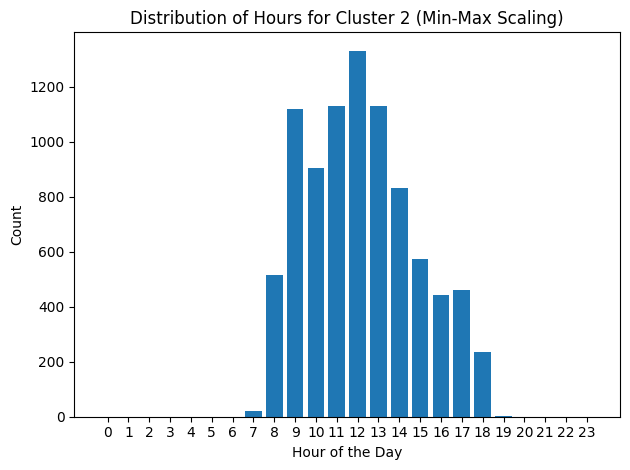

In [72]:
# Create a list to store the hour values
hours = [timestamp.hour for timestamp in timestamps]

# Count the occurrences of each hour
hour_counts = [hours.count(hour) for hour in range(24)]

# Plot the distribution of hours
plt.bar(range(24), hour_counts)
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Distribution of Hours for Cluster 2 (Min-Max Scaling)')
plt.xticks(range(24))
plt.tight_layout()
plt.savefig('hour_cut3.png', dpi=240)
plt.show()

In [73]:
# Extract the timestamps for cluster number 2
timestamps = cluster_indexes['Min-Max Scaling'][2]

# Get the unique dates
unique_dates = set(timestamp.date() for timestamp in timestamps)

# Print the unique dates
for date in sorted(unique_dates):
    print(date)


2023-03-23
2023-03-24
2023-03-25
2023-03-26
2023-03-27
2023-03-28
2023-03-30
2023-04-02
2023-04-03
2023-04-04
2023-04-05
2023-04-08
2023-04-09
2023-04-10
2023-04-11
2023-04-12
2023-04-13
2023-04-14
2023-04-15
2023-04-17
2023-04-18
2023-04-19
2023-04-20
2023-04-21
2023-04-22
2023-04-23
2023-04-24
2023-04-25
2023-04-26
2023-04-27
2023-04-29
2023-04-30
2023-05-01
2023-05-02
2023-05-03
2023-05-04
2023-05-05
2023-05-06
2023-05-07
2023-05-08
2023-05-10
2023-05-12
2023-05-13
2023-05-14
2023-05-16
2023-05-17
2023-05-18
2023-05-19


In [74]:

# Dictionary to store the weekday counts
weekday_counts = defaultdict(set)

# Loop through the data
for scaling_method, scaling_clusters in cluster_indexes.items():
    for cluster, timestamps in scaling_clusters.items():
        weekday_set = set()

        for timestamp in timestamps:
            weekday = timestamp.weekday()  # Get the weekday (Monday = 0, Sunday = 6)

            # Add the date to the weekday set
            weekday_set.add(timestamp.date())

        # Update the weekday counts
        weekday_counts[(scaling_method, cluster)].update(weekday_set)

# Calculate the count of unique dates for each weekday
weekday_unique_counts = {
    (scaling_method, cluster, weekday): len(date_set)
    for (scaling_method, cluster), date_set in weekday_counts.items()
    for weekday in range(7)
}

# Sort the weekday_unique_counts dictionary by scaling method, cluster, and then weekday
sorted_weekday_counts = sorted(
    weekday_unique_counts.items(),
    key=lambda x: (x[0][0], x[0][1], x[0][2])
)

# Display the weekday distribution
for (scaling_method, cluster, weekday), count in sorted_weekday_counts:
    weekday_name = datetime.date(2000, 1, weekday + 1).strftime("%A")  # Convert weekday number to weekday name
    print(f"{scaling_method}, Cluster {cluster}, Weekday {weekday_name}: {count}")

Min-Max Scaling, Cluster 0, Weekday Saturday: 59
Min-Max Scaling, Cluster 0, Weekday Sunday: 59
Min-Max Scaling, Cluster 0, Weekday Monday: 59
Min-Max Scaling, Cluster 0, Weekday Tuesday: 59
Min-Max Scaling, Cluster 0, Weekday Wednesday: 59
Min-Max Scaling, Cluster 0, Weekday Thursday: 59
Min-Max Scaling, Cluster 0, Weekday Friday: 59
Min-Max Scaling, Cluster 1, Weekday Saturday: 40
Min-Max Scaling, Cluster 1, Weekday Sunday: 40
Min-Max Scaling, Cluster 1, Weekday Monday: 40
Min-Max Scaling, Cluster 1, Weekday Tuesday: 40
Min-Max Scaling, Cluster 1, Weekday Wednesday: 40
Min-Max Scaling, Cluster 1, Weekday Thursday: 40
Min-Max Scaling, Cluster 1, Weekday Friday: 40
Min-Max Scaling, Cluster 2, Weekday Saturday: 48
Min-Max Scaling, Cluster 2, Weekday Sunday: 48
Min-Max Scaling, Cluster 2, Weekday Monday: 48
Min-Max Scaling, Cluster 2, Weekday Tuesday: 48
Min-Max Scaling, Cluster 2, Weekday Wednesday: 48
Min-Max Scaling, Cluster 2, Weekday Thursday: 48
Min-Max Scaling, Cluster 2, Weekday 

In [75]:
# Extract the timestamps for cluster number 2
timestamps = cluster_indexes['Min-Max Scaling'][2]

# Get the unique dates
unique_dates = set(timestamp.date() for timestamp in timestamps)

# Create a dictionary to store the weekday counts
weekday_counts = defaultdict(int)

# Count the occurrences of each weekday from the unique dates
for date in unique_dates:
    weekday = date.weekday()  # Get the weekday (Monday = 0, Sunday = 6)
    weekday_counts[weekday] += 1

# Display the weekday counts
for weekday in range(7):
    weekday_name = datetime.date(2000, 1, weekday + 1).strftime("%A")  # Convert weekday number to weekday name
    count = weekday_counts[weekday]
    print(f"Weekday {weekday_name}: {count}")

Weekday Saturday: 7
Weekday Sunday: 7
Weekday Monday: 7
Weekday Tuesday: 7
Weekday Wednesday: 6
Weekday Thursday: 7
Weekday Friday: 7


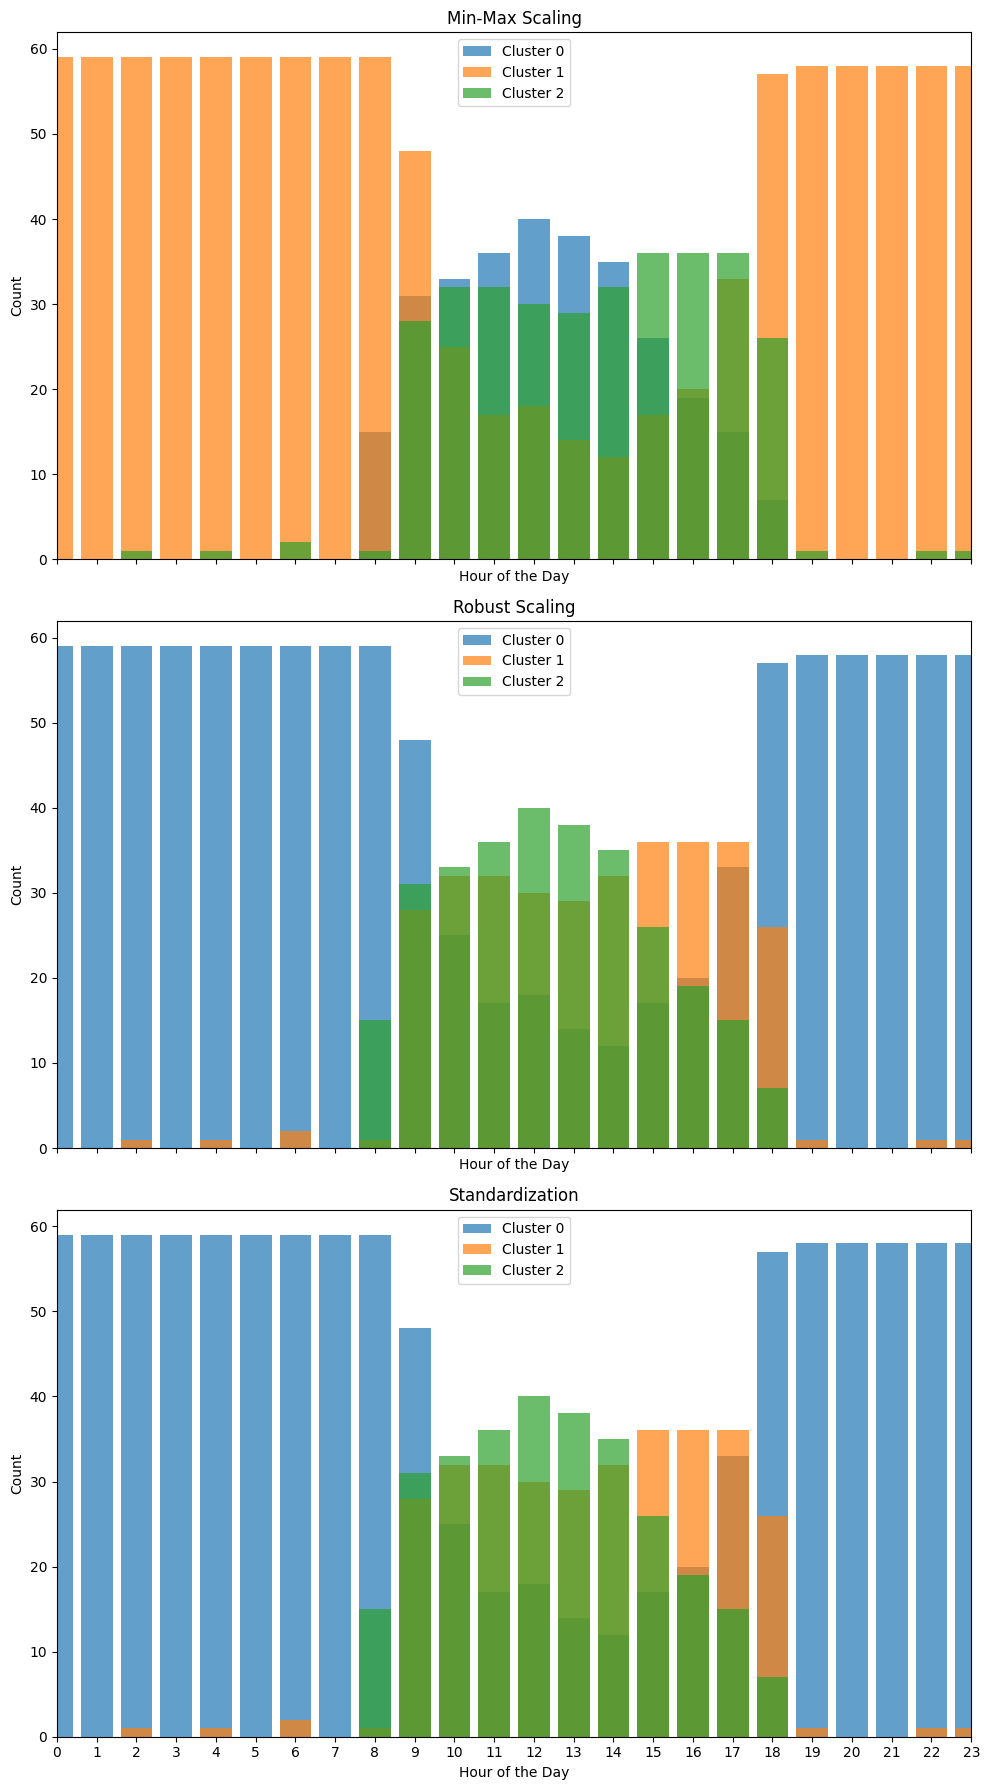

In [76]:
# Extract the unique scaling methods, clusters, and hours
scaling_methods = sorted(set([item[0][0] for item in sorted_hour_counts]))
clusters = sorted(set([item[0][1] for item in sorted_hour_counts]))
hours = sorted(set([item[0][2] for item in sorted_hour_counts]))

# Create a colormap for different clusters
cmap = plt.get_cmap('tab10')

# Create subplots for each scaling method
fig, axs = plt.subplots(len(scaling_methods), 1, figsize=(10, 6 * len(scaling_methods)), sharex=True)

# Iterate over the scaling methods and create a subplot for each
for i, scaling_method in enumerate(scaling_methods):
    # Filter the sorted hour counts based on the current scaling method
    method_counts = [(item[0][1], item[0][2], item[1]) for item in sorted_hour_counts if item[0][0] == scaling_method]

    # Initialize an array to store the counts for each cluster and hour
    cluster_counts = np.zeros((len(clusters), len(hours)))

    # Populate the cluster_counts array
    for cluster, hour, count in method_counts:
        cluster_index = clusters.index(cluster)
        hour_index = hours.index(hour)
        cluster_counts[cluster_index, hour_index] = count

    # Plot the histogram for the current scaling method
    for j in range(len(clusters)):
        axs[i].bar(hours, cluster_counts[j], color=cmap(j), alpha=0.7)

    # Set the x-axis limits and labels
    axs[i].set_xlim(0, 23)
    axs[i].set_xticks(hours)
    axs[i].set_xlabel('Hour of the Day')

    # Set the y-axis label
    axs[i].set_ylabel('Count')

    # Set the title
    axs[i].set_title(scaling_method)

    # Add a legend for the clusters
    legend_labels = [f'Cluster {cluster}' for cluster in clusters]
    axs[i].legend(legend_labels)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [77]:
# Perform K-means clustering for each scaling method
k = 3
cluster_indexes = {}
cluster_information = {}

scaling_methods = {
    'Min-Max Scaling': MinMaxScaler(),
    'Standardization': StandardScaler(),
    'Robust Scaling': RobustScaler()
}

# Select all columns from time_series_data
data = time_series_data[['pir', 'alight', 'value', 'shade']].copy()

for method_name, scaler in scaling_methods.items():
    # Scale the columns
    scaled_data = scaler.fit_transform(data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Add the cluster labels to the DataFrame
    data[f'Cluster ({method_name})'] = clusters

    # Get the data point indexes for each cluster
    cluster_indexes[method_name] = {}
    for cluster_label in range(k):
        cluster_indexes[method_name][cluster_label] = data.index[data[f'Cluster ({method_name})'] == cluster_label].tolist()

    # Get the cluster information
    cluster_information[method_name] = {}
    for cluster_label, indexes in cluster_indexes[method_name].items():
        cluster_data = data.loc[indexes]
        cluster_information[method_name][cluster_label] = cluster_data.describe()

# Print the cluster information
for method_name, clusters in cluster_information.items():
    print(f"Cluster Information - {method_name}")
    for cluster_label, cluster_data in clusters.items():
        print(f"Cluster: {cluster_label}")
        print(cluster_data)
        print()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Information - Min-Max Scaling
Cluster: 0
                pir        alight         value         shade  \
count  16841.000000  16841.000000  16841.000000  16841.000000   
mean       0.373060     23.847335  32284.293417     10.026808   
std        0.277876     18.125396  16091.341877      9.246545   
min        0.000000      0.000000   1295.591310      0.000000   
25%        0.052381      3.809524  18121.049405      2.021059   
50%        0.419048     26.666667  31796.051310      7.790535   
75%        0.576190     38.095238  45725.487262     16.577465   
max        2.388095     64.761905  83564.982619     70.238095   

       Cluster (Min-Max Scaling)  
count                    16841.0  
mean                         0.0  
std                          0.0  
min                          0.0  
25%                          0.0  
50%                          0.0  
75%                          0.0  
max                          0.0  

Cluster: 1
                pir        alight     

In [78]:
# Perform K-means clustering for each scaling method
k = 3
cluster_indexes = {}
cluster_information = {}

# Select all columns from time_series_data
data = time_series_data[['alight', 'value', 'shade']].copy()

for method_name, scaler in scaling_methods.items():
    # Scale the columns
    scaled_data = scaler.fit_transform(data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Add the cluster labels to the DataFrame
    data[f'Cluster ({method_name})'] = clusters

    # Get the data point indexes for each cluster
    cluster_indexes[method_name] = {}
    for cluster_label in range(k):
        cluster_indexes[method_name][cluster_label] = data.index[data[f'Cluster ({method_name})'] == cluster_label].tolist()

    # Get the cluster information
    cluster_information[method_name] = {}
    for cluster_label, indexes in cluster_indexes[method_name].items():
        cluster_data = data.loc[indexes]
        cluster_information[method_name][cluster_label] = cluster_data.describe()

# Print the cluster information
for method_name, clusters in cluster_information.items():
    print(f"Cluster Information - {method_name}")
    for cluster_label, cluster_data in clusters.items():
        print(f"Cluster: {cluster_label}")
        print(cluster_data)
        print()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Information - Min-Max Scaling
Cluster: 0
             alight         value         shade  Cluster (Min-Max Scaling)
count  58829.000000  58829.000000  58829.000000                    58829.0
mean       1.507499   2706.521099      1.113350                        0.0
std        3.850064   4972.119192      3.147241                        0.0
min        0.000000      0.000000      0.000000                        0.0
25%        0.000000      0.192500      0.000000                        0.0
50%        0.000000      0.843571      0.000000                        0.0
75%        0.000000   3156.105238      0.000000                        0.0
max       31.468254  22804.445476     25.485055                        0.0

Cluster: 1
             alight         value         shade  Cluster (Min-Max Scaling)
count  16707.000000  16707.000000  16707.000000                    16707.0
mean      39.528032  24857.580180     17.053483                        1.0
std        9.281614  15460.724690      

In [79]:
# Perform K-means clustering for each scaling method
k = 3
cluster_indexes = {}
cluster_information = {}

# Select all columns from time_series_data
data = time_series_data[['pir', 'alight', 'value', 'shade']].copy()

for method_name, scaler in scaling_methods.items():
    # Scale the columns
    scaled_data = scaler.fit_transform(data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Add the cluster labels to the DataFrame
    data[f'Cluster ({method_name})'] = clusters

    # Get the data point indexes for each cluster
    cluster_indexes[method_name] = {}
    for cluster_label in range(k):
        cluster_indexes[method_name][cluster_label] = data.index[data[f'Cluster ({method_name})'] == cluster_label].tolist()

    # Get the cluster information
    cluster_information[method_name] = {}
    for cluster_label, indexes in cluster_indexes[method_name].items():
        cluster_information[method_name][cluster_label] = {'Indexes': indexes}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [80]:
# Dictionary to store the hour counts
hour_counts = defaultdict(int)

# Loop through the data
for scaling_method, scaling_clusters in cluster_indexes.items():
    for cluster, timestamps in scaling_clusters.items():
        hour_day_set = set()

        for timestamp in timestamps:
            hour = timestamp.hour
            day = timestamp.date()

            # Add the hour and day combination to the set
            hour_day_set.add((hour, day))

        # Update the hour counts
        for hour_day in hour_day_set:
            hour_counts[(scaling_method, cluster, hour_day[0])] += 1

# Sort the hour_counts dictionary by scaling method, cluster, and then hour
sorted_hour_counts = sorted(
    hour_counts.items(),
    key=lambda x: (x[0][0], x[0][1], x[0][2])
)

# Display the hour distribution
for (scaling_method, cluster, hour), count in sorted_hour_counts:
    print(f"{scaling_method}, Cluster {cluster}, Hour {hour}: {count}")

Min-Max Scaling, Cluster 0, Hour 7: 1
Min-Max Scaling, Cluster 0, Hour 8: 20
Min-Max Scaling, Cluster 0, Hour 9: 43
Min-Max Scaling, Cluster 0, Hour 10: 43
Min-Max Scaling, Cluster 0, Hour 11: 39
Min-Max Scaling, Cluster 0, Hour 12: 39
Min-Max Scaling, Cluster 0, Hour 13: 39
Min-Max Scaling, Cluster 0, Hour 14: 39
Min-Max Scaling, Cluster 0, Hour 15: 31
Min-Max Scaling, Cluster 0, Hour 16: 39
Min-Max Scaling, Cluster 0, Hour 17: 42
Min-Max Scaling, Cluster 0, Hour 18: 32
Min-Max Scaling, Cluster 0, Hour 19: 3
Min-Max Scaling, Cluster 1, Hour 0: 59
Min-Max Scaling, Cluster 1, Hour 1: 59
Min-Max Scaling, Cluster 1, Hour 2: 59
Min-Max Scaling, Cluster 1, Hour 3: 59
Min-Max Scaling, Cluster 1, Hour 4: 59
Min-Max Scaling, Cluster 1, Hour 5: 59
Min-Max Scaling, Cluster 1, Hour 6: 59
Min-Max Scaling, Cluster 1, Hour 7: 59
Min-Max Scaling, Cluster 1, Hour 8: 59
Min-Max Scaling, Cluster 1, Hour 9: 43
Min-Max Scaling, Cluster 1, Hour 10: 21
Min-Max Scaling, Cluster 1, Hour 11: 16
Min-Max Scaling

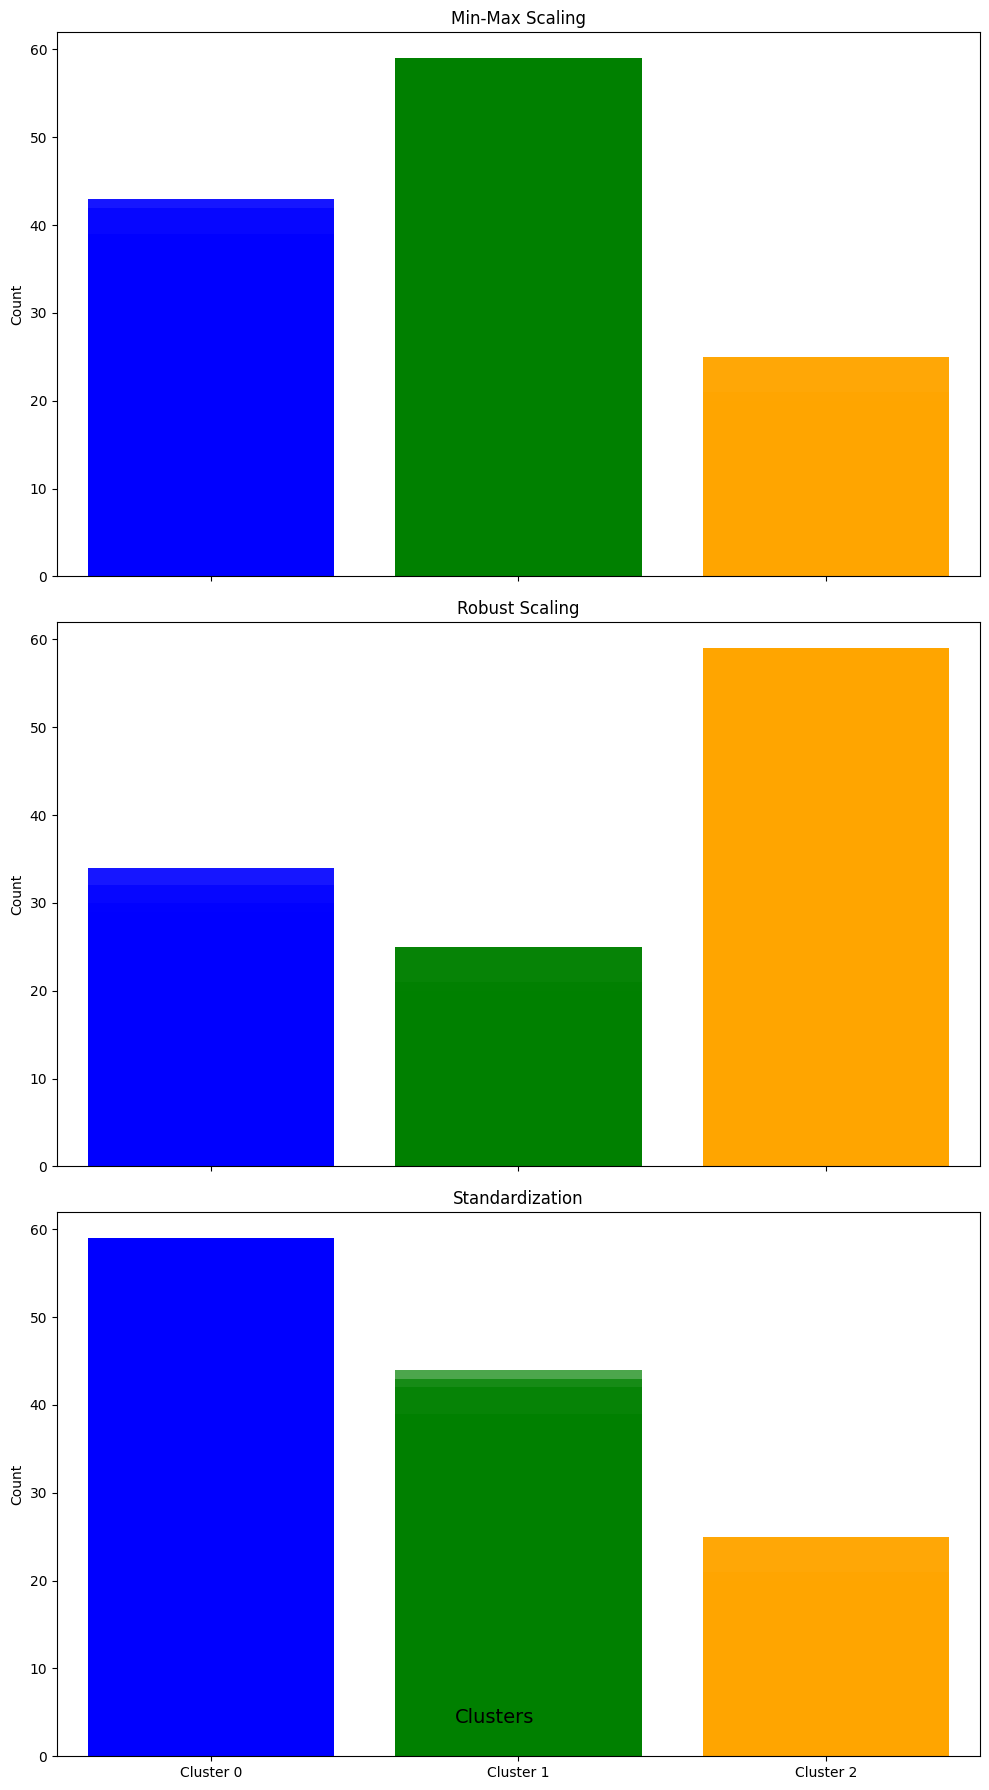

In [81]:
# Extract the unique scaling methods and clusters
scaling_methods = sorted(set([item[0][0] for item in sorted_hour_counts]))
clusters = sorted(set([item[0][1] for item in sorted_hour_counts]))

# Define the colors for different clusters
cluster_colors = ['blue', 'green', 'orange']

# Create subplots for each scaling method
fig, axs = plt.subplots(len(scaling_methods), 1, figsize=(10, 6 * len(scaling_methods)), sharex=True)

# Iterate over the scaling methods and create a subplot for each
for i, scaling_method in enumerate(scaling_methods):
    # Filter the sorted hour counts based on the current scaling method
    method_counts = [(item[0][1], item[0][2], item[1]) for item in sorted_hour_counts if item[0][0] == scaling_method]

    # Create bins for the histogram
    bins = np.arange(len(clusters)) - 0.5

    # Plot the histogram for the current scaling method
    for cluster in clusters:
        cluster_counts = [item[2] for item in method_counts if item[0] == cluster]
        axs[i].bar(cluster, cluster_counts, color=cluster_colors[cluster], alpha=0.7)

    # Set the x-axis limits and labels
    axs[i].set_xlim(-0.5, len(clusters) - 0.5)
    axs[i].set_xticks(range(len(clusters)))
    axs[i].set_xticklabels([f"Cluster {cluster}" for cluster in clusters])

    # Set the y-axis label
    axs[i].set_ylabel('Count')

    # Set the title
    axs[i].set_title(scaling_method)

# Set the common x-axis label
fig.text(0.5, 0.04, 'Clusters', ha='center', fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

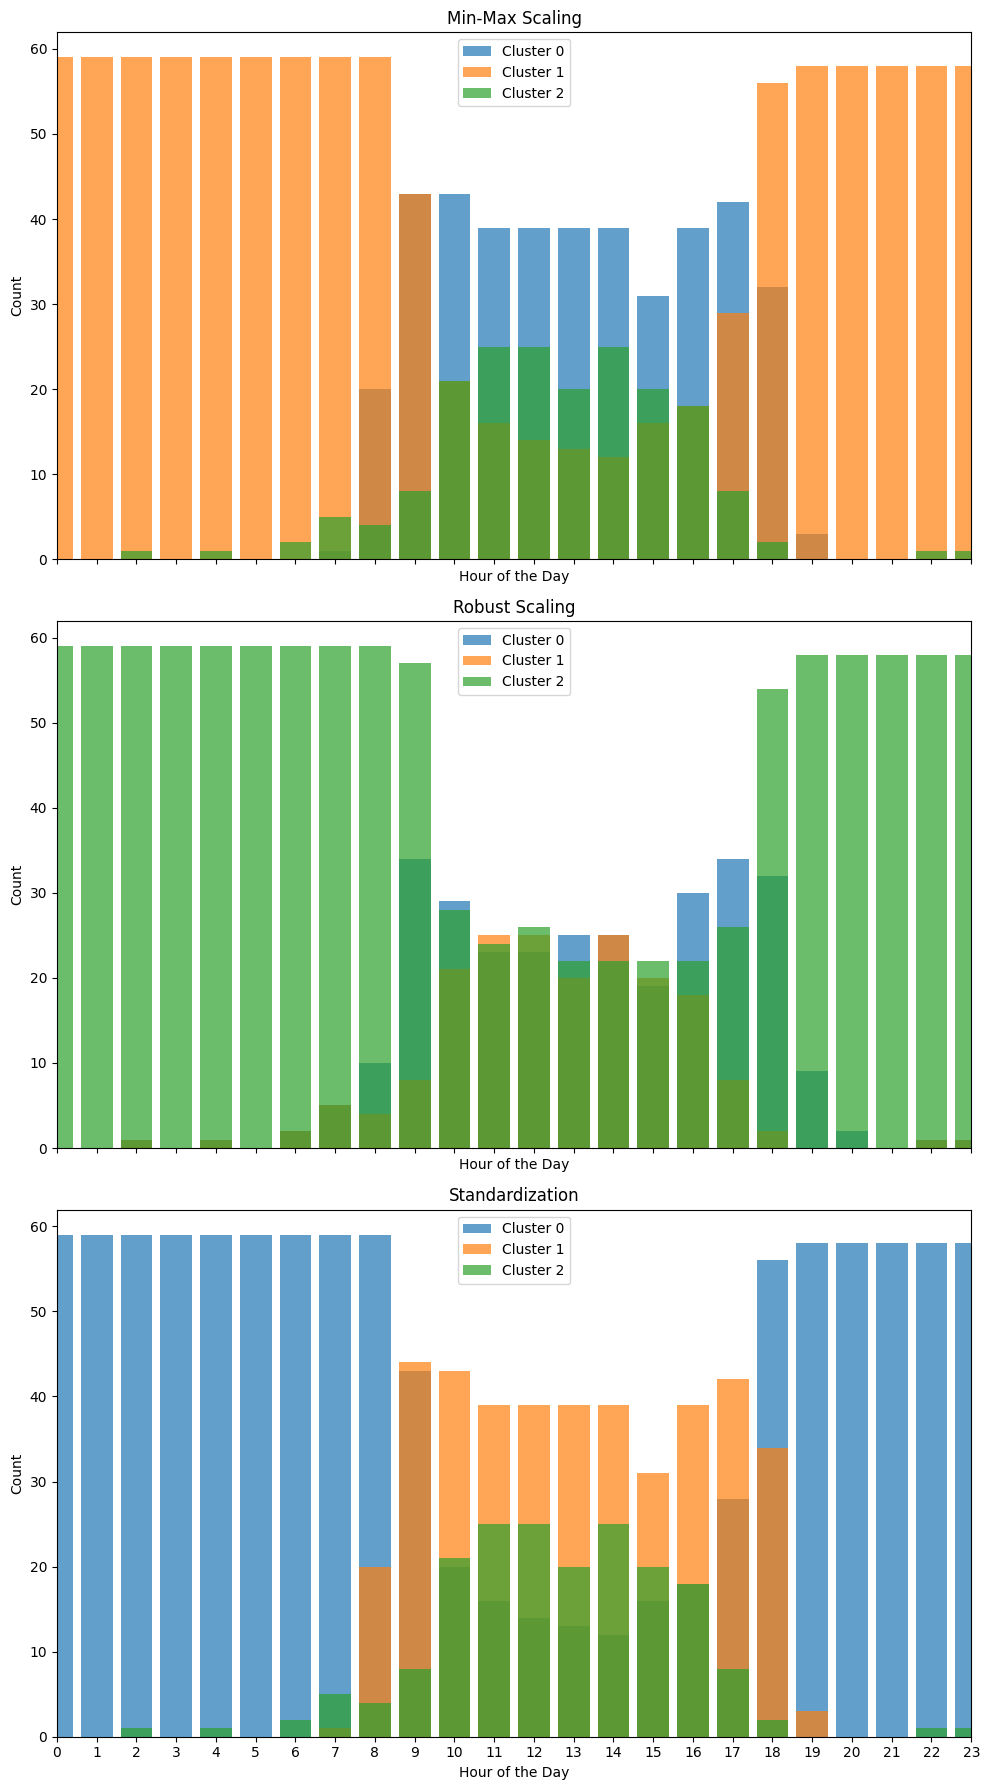

In [82]:
# Extract the unique scaling methods, clusters, and hours
scaling_methods = sorted(set([item[0][0] for item in sorted_hour_counts]))
clusters = sorted(set([item[0][1] for item in sorted_hour_counts]))
hours = sorted(set([item[0][2] for item in sorted_hour_counts]))

# Create a colormap for different clusters
cmap = plt.get_cmap('tab10')

# Create subplots for each scaling method
fig, axs = plt.subplots(len(scaling_methods), 1, figsize=(10, 6 * len(scaling_methods)), sharex=True)

# Iterate over the scaling methods and create a subplot for each
for i, scaling_method in enumerate(scaling_methods):
    # Filter the sorted hour counts based on the current scaling method
    method_counts = [(item[0][1], item[0][2], item[1]) for item in sorted_hour_counts if item[0][0] == scaling_method]

    # Initialize an array to store the counts for each cluster and hour
    cluster_counts = np.zeros((len(clusters), len(hours)))

    # Populate the cluster_counts array
    for cluster, hour, count in method_counts:
        cluster_index = clusters.index(cluster)
        hour_index = hours.index(hour)
        cluster_counts[cluster_index, hour_index] = count

    # Plot the histogram for the current scaling method
    for j in range(len(clusters)):
        axs[i].bar(hours, cluster_counts[j], color=cmap(j), alpha=0.7)

    # Set the x-axis limits and labels
    axs[i].set_xlim(0, 23)
    axs[i].set_xticks(hours)
    axs[i].set_xlabel('Hour of the Day')

    # Set the y-axis label
    axs[i].set_ylabel('Count')

    # Set the title
    axs[i].set_title(scaling_method)

    # Add a legend for the clusters
    legend_labels = [f'Cluster {cluster}' for cluster in clusters]
    axs[i].legend(legend_labels)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [83]:
# Scaling methods
scaling_methods = {
    'Min-Max Scaling': MinMaxScaler(),
    'Standardization': StandardScaler(),
    'Robust Scaling': RobustScaler()
}

# Perform K-means clustering for each scaling method
k = 3
cluster_indexes = {}
cluster_information = {}

# Select all columns from time_series_data
data = time_series_data[['pir', 'alight']].copy()

for method_name, scaler in scaling_methods.items():
    # Scale the columns
    scaled_data = scaler.fit_transform(data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Add the cluster labels to the DataFrame
    data[f'Cluster ({method_name})'] = clusters

    # Get the data point indexes for each cluster
    cluster_indexes[method_name] = {}
    for cluster_label in range(k):
        cluster_indexes[method_name][cluster_label] = data.index[data[f'Cluster ({method_name})'] == cluster_label].tolist()

    # Get the cluster information
    cluster_information[method_name] = {}
    for cluster_label, indexes in cluster_indexes[method_name].items():
        cluster_information[method_name][cluster_label] = {'Indexes': indexes}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [84]:
# Dictionary to store the hour counts
hour_counts = defaultdict(int)

# Loop through the data
for scaling_method, scaling_clusters in cluster_indexes.items():
    for cluster, timestamps in scaling_clusters.items():
        hour_day_set = set()

        for timestamp in timestamps:
            hour = timestamp.hour
            day = timestamp.date()

            # Add the hour and day combination to the set
            hour_day_set.add((hour, day))

        # Update the hour counts
        for hour_day in hour_day_set:
            hour_counts[(scaling_method, cluster, hour_day[0])] += 1

# Sort the hour_counts dictionary by scaling method, cluster, and then hour
sorted_hour_counts = sorted(
    hour_counts.items(),
    key=lambda x: (x[0][0], x[0][1], x[0][2])
)

# Display the hour distribution
for (scaling_method, cluster, hour), count in sorted_hour_counts:
    print(f"{scaling_method}, Cluster {cluster}, Hour {hour}: {count}")

Min-Max Scaling, Cluster 0, Hour 0: 59
Min-Max Scaling, Cluster 0, Hour 1: 59
Min-Max Scaling, Cluster 0, Hour 2: 59
Min-Max Scaling, Cluster 0, Hour 3: 59
Min-Max Scaling, Cluster 0, Hour 4: 59
Min-Max Scaling, Cluster 0, Hour 5: 59
Min-Max Scaling, Cluster 0, Hour 6: 59
Min-Max Scaling, Cluster 0, Hour 7: 59
Min-Max Scaling, Cluster 0, Hour 8: 59
Min-Max Scaling, Cluster 0, Hour 9: 56
Min-Max Scaling, Cluster 0, Hour 10: 27
Min-Max Scaling, Cluster 0, Hour 11: 24
Min-Max Scaling, Cluster 0, Hour 12: 25
Min-Max Scaling, Cluster 0, Hour 13: 22
Min-Max Scaling, Cluster 0, Hour 14: 22
Min-Max Scaling, Cluster 0, Hour 15: 22
Min-Max Scaling, Cluster 0, Hour 16: 22
Min-Max Scaling, Cluster 0, Hour 17: 29
Min-Max Scaling, Cluster 0, Hour 18: 55
Min-Max Scaling, Cluster 0, Hour 19: 58
Min-Max Scaling, Cluster 0, Hour 20: 58
Min-Max Scaling, Cluster 0, Hour 21: 58
Min-Max Scaling, Cluster 0, Hour 22: 58
Min-Max Scaling, Cluster 0, Hour 23: 58
Min-Max Scaling, Cluster 1, Hour 2: 1
Min-Max Scal

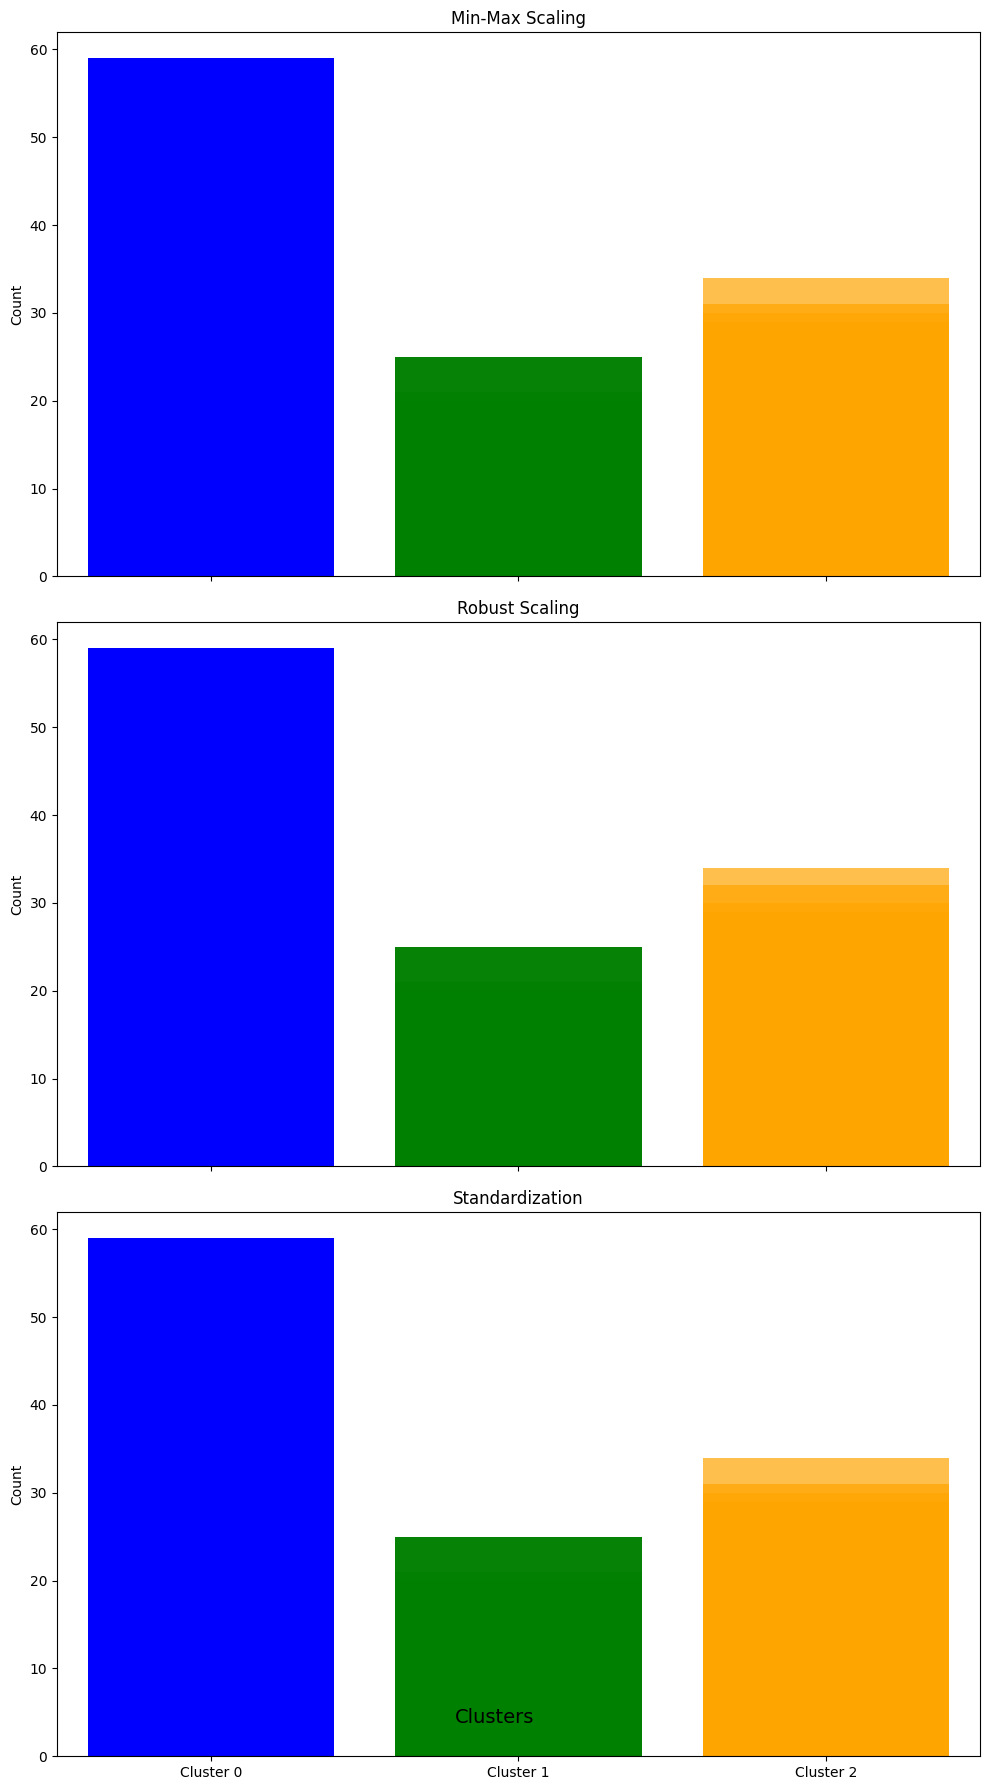

In [85]:
# Extract the unique scaling methods and clusters
scaling_methods = sorted(set([item[0][0] for item in sorted_hour_counts]))
clusters = sorted(set([item[0][1] for item in sorted_hour_counts]))

# Define the colors for different clusters
cluster_colors = ['blue', 'green', 'orange']

# Create subplots for each scaling method
fig, axs = plt.subplots(len(scaling_methods), 1, figsize=(10, 6 * len(scaling_methods)), sharex=True)

# Iterate over the scaling methods and create a subplot for each
for i, scaling_method in enumerate(scaling_methods):
    # Filter the sorted hour counts based on the current scaling method
    method_counts = [(item[0][1], item[0][2], item[1]) for item in sorted_hour_counts if item[0][0] == scaling_method]

    # Create bins for the histogram
    bins = np.arange(len(clusters)) - 0.5

    # Plot the histogram for the current scaling method
    for cluster in clusters:
        cluster_counts = [item[2] for item in method_counts if item[0] == cluster]
        axs[i].bar(cluster, cluster_counts, color=cluster_colors[cluster], alpha=0.7)

    # Set the x-axis limits and labels
    axs[i].set_xlim(-0.5, len(clusters) - 0.5)
    axs[i].set_xticks(range(len(clusters)))
    axs[i].set_xticklabels([f"Cluster {cluster}" for cluster in clusters])

    # Set the y-axis label
    axs[i].set_ylabel('Count')

    # Set the title
    axs[i].set_title(scaling_method)

# Set the common x-axis label
fig.text(0.5, 0.04, 'Clusters', ha='center', fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

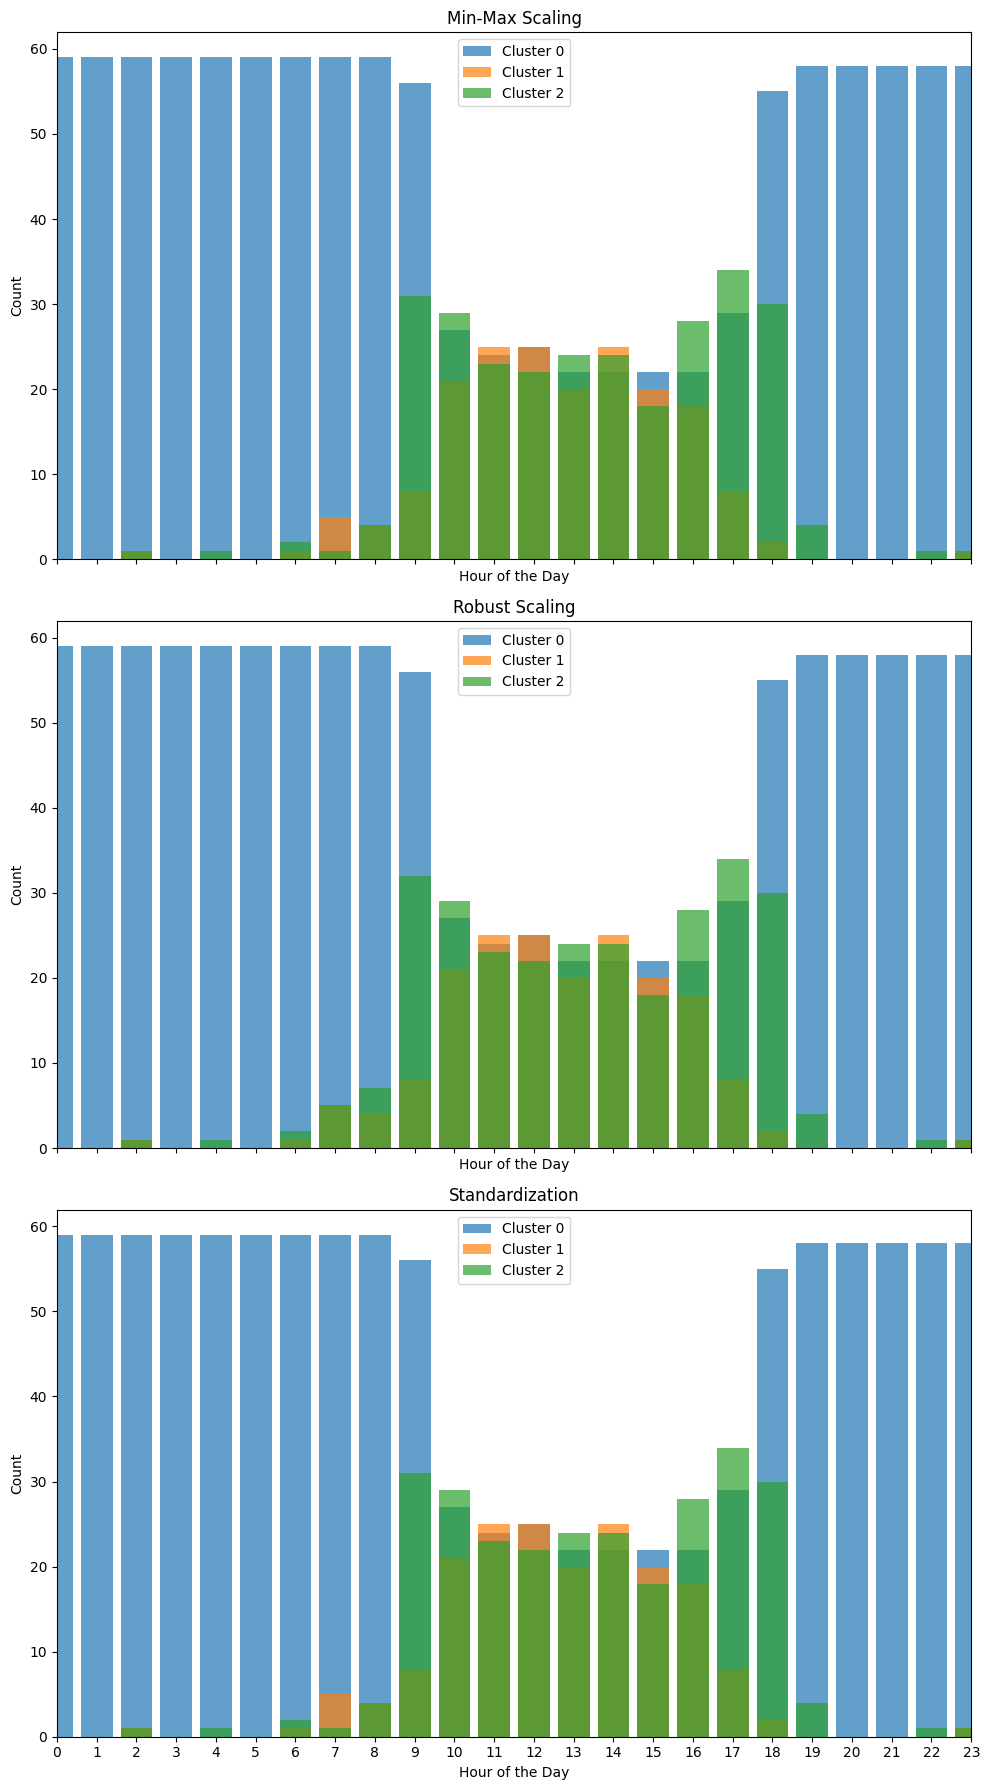

In [86]:
# Extract the unique scaling methods, clusters, and hours
scaling_methods = sorted(set([item[0][0] for item in sorted_hour_counts]))
clusters = sorted(set([item[0][1] for item in sorted_hour_counts]))
hours = sorted(set([item[0][2] for item in sorted_hour_counts]))

# Create a colormap for different clusters
cmap = plt.get_cmap('tab10')

# Create subplots for each scaling method
fig, axs = plt.subplots(len(scaling_methods), 1, figsize=(10, 6 * len(scaling_methods)), sharex=True)

# Iterate over the scaling methods and create a subplot for each
for i, scaling_method in enumerate(scaling_methods):
    # Filter the sorted hour counts based on the current scaling method
    method_counts = [(item[0][1], item[0][2], item[1]) for item in sorted_hour_counts if item[0][0] == scaling_method]

    # Initialize an array to store the counts for each cluster and hour
    cluster_counts = np.zeros((len(clusters), len(hours)))

    # Populate the cluster_counts array
    for cluster, hour, count in method_counts:
        cluster_index = clusters.index(cluster)
        hour_index = hours.index(hour)
        cluster_counts[cluster_index, hour_index] = count

    # Plot the histogram for the current scaling method
    for j in range(len(clusters)):
        axs[i].bar(hours, cluster_counts[j], color=cmap(j), alpha=0.7)

    # Set the x-axis limits and labels
    axs[i].set_xlim(0, 23)
    axs[i].set_xticks(hours)
    axs[i].set_xlabel('Hour of the Day')

    # Set the y-axis label
    axs[i].set_ylabel('Count')

    # Set the title
    axs[i].set_title(scaling_method)

    # Add a legend for the clusters
    legend_labels = [f'Cluster {cluster}' for cluster in clusters]
    axs[i].legend(legend_labels)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [87]:
# Scaling methods
scaling_methods = {
    'Min-Max Scaling': MinMaxScaler(),
    'Standardization': StandardScaler(),
    'Robust Scaling': RobustScaler()
}

# Perform K-means clustering for each scaling method
k = 3
cluster_indexes = {}
cluster_information = {}

# Select all columns from time_series_data
data = time_series_data[['value', 'alight']].copy()

for method_name, scaler in scaling_methods.items():
    # Scale the columns
    scaled_data = scaler.fit_transform(data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Add the cluster labels to the DataFrame
    data[f'Cluster ({method_name})'] = clusters

    # Get the data point indexes for each cluster
    cluster_indexes[method_name] = {}
    for cluster_label in range(k):
        cluster_indexes[method_name][cluster_label] = data.index[data[f'Cluster ({method_name})'] == cluster_label].tolist()

    # Get the cluster information
    cluster_information[method_name] = {}
    for cluster_label, indexes in cluster_indexes[method_name].items():
        cluster_information[method_name][cluster_label] = {'Indexes': indexes}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [88]:
# Dictionary to store the hour counts
hour_counts = defaultdict(int)

# Loop through the data
for scaling_method, scaling_clusters in cluster_indexes.items():
    for cluster, timestamps in scaling_clusters.items():
        hour_day_set = set()

        for timestamp in timestamps:
            hour = timestamp.hour
            day = timestamp.date()

            # Add the hour and day combination to the set
            hour_day_set.add((hour, day))

        # Update the hour counts
        for hour_day in hour_day_set:
            hour_counts[(scaling_method, cluster, hour_day[0])] += 1

# Sort the hour_counts dictionary by scaling method, cluster, and then hour
sorted_hour_counts = sorted(
    hour_counts.items(),
    key=lambda x: (x[0][0], x[0][1], x[0][2])
)

# Display the hour distribution
for (scaling_method, cluster, hour), count in sorted_hour_counts:
    print(f"{scaling_method}, Cluster {cluster}, Hour {hour}: {count}")

Min-Max Scaling, Cluster 0, Hour 8: 15
Min-Max Scaling, Cluster 0, Hour 9: 31
Min-Max Scaling, Cluster 0, Hour 10: 33
Min-Max Scaling, Cluster 0, Hour 11: 36
Min-Max Scaling, Cluster 0, Hour 12: 40
Min-Max Scaling, Cluster 0, Hour 13: 38
Min-Max Scaling, Cluster 0, Hour 14: 35
Min-Max Scaling, Cluster 0, Hour 15: 26
Min-Max Scaling, Cluster 0, Hour 16: 19
Min-Max Scaling, Cluster 0, Hour 17: 15
Min-Max Scaling, Cluster 0, Hour 18: 7
Min-Max Scaling, Cluster 1, Hour 0: 59
Min-Max Scaling, Cluster 1, Hour 1: 59
Min-Max Scaling, Cluster 1, Hour 2: 59
Min-Max Scaling, Cluster 1, Hour 3: 59
Min-Max Scaling, Cluster 1, Hour 4: 59
Min-Max Scaling, Cluster 1, Hour 5: 59
Min-Max Scaling, Cluster 1, Hour 6: 59
Min-Max Scaling, Cluster 1, Hour 7: 59
Min-Max Scaling, Cluster 1, Hour 8: 59
Min-Max Scaling, Cluster 1, Hour 9: 48
Min-Max Scaling, Cluster 1, Hour 10: 25
Min-Max Scaling, Cluster 1, Hour 11: 17
Min-Max Scaling, Cluster 1, Hour 12: 18
Min-Max Scaling, Cluster 1, Hour 13: 14
Min-Max Scali

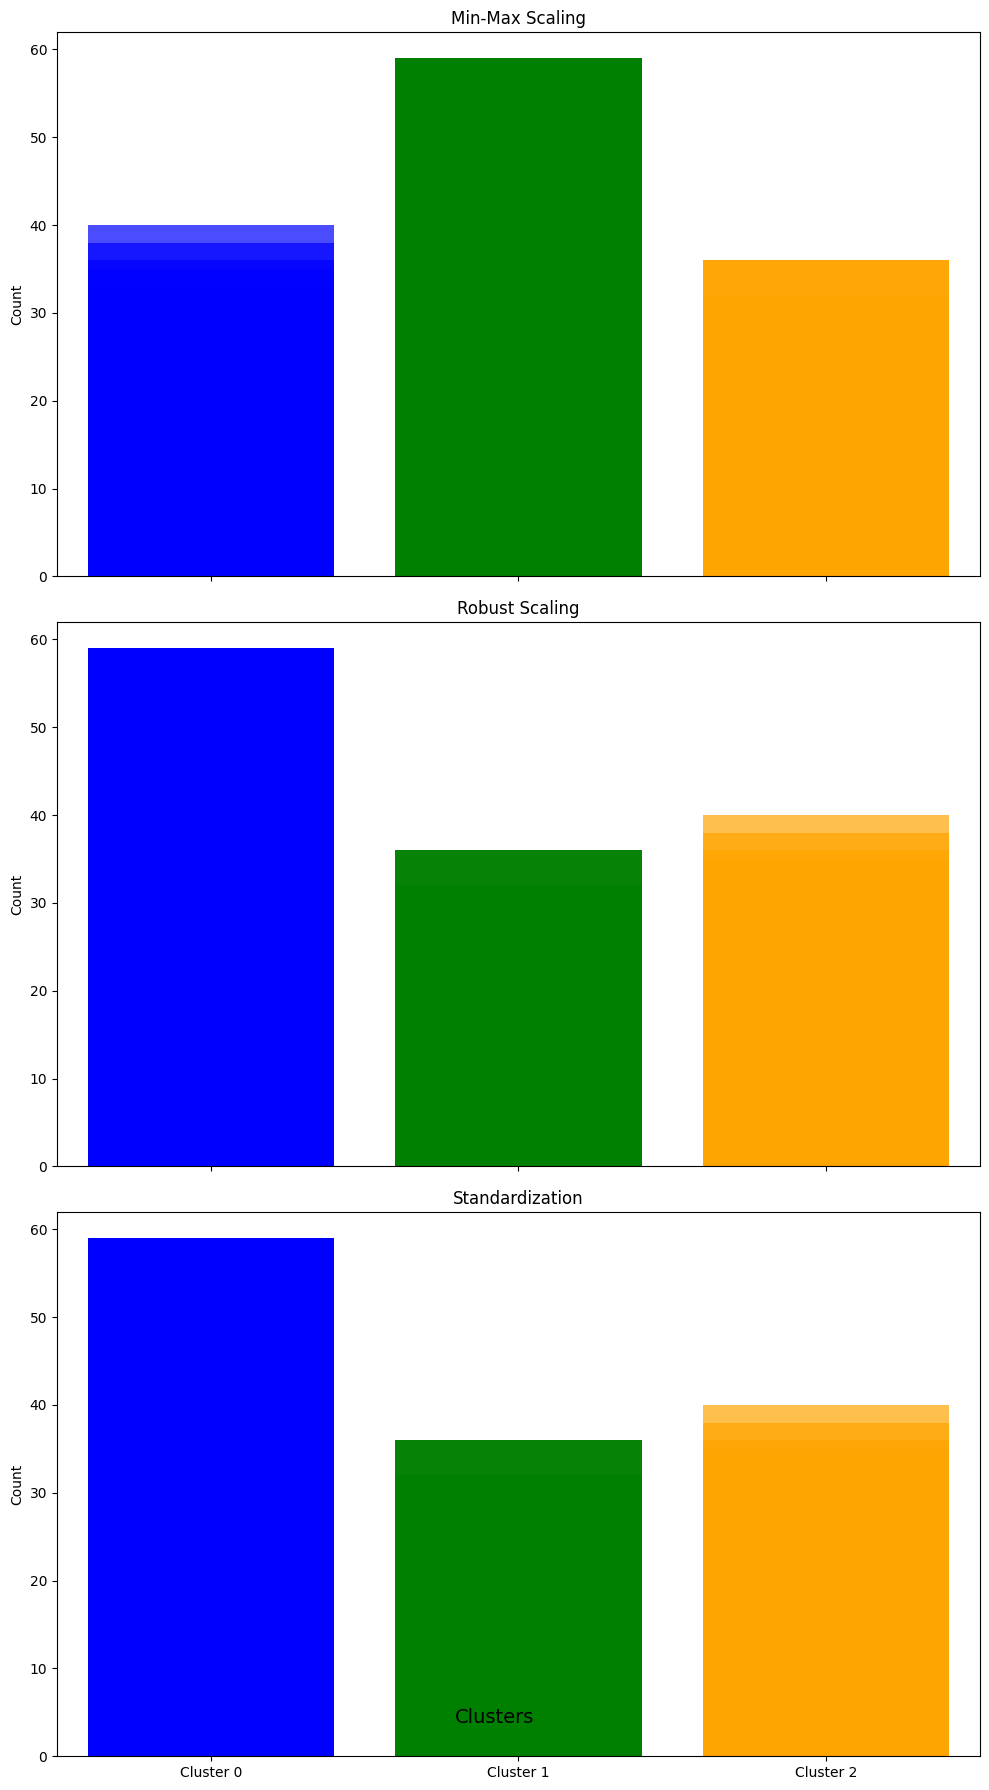

In [89]:
# Extract the unique scaling methods and clusters
scaling_methods = sorted(set([item[0][0] for item in sorted_hour_counts]))
clusters = sorted(set([item[0][1] for item in sorted_hour_counts]))

# Define the colors for different clusters
cluster_colors = ['blue', 'green', 'orange']

# Create subplots for each scaling method
fig, axs = plt.subplots(len(scaling_methods), 1, figsize=(10, 6 * len(scaling_methods)), sharex=True)

# Iterate over the scaling methods and create a subplot for each
for i, scaling_method in enumerate(scaling_methods):
    # Filter the sorted hour counts based on the current scaling method
    method_counts = [(item[0][1], item[0][2], item[1]) for item in sorted_hour_counts if item[0][0] == scaling_method]

    # Create bins for the histogram
    bins = np.arange(len(clusters)) - 0.5

    # Plot the histogram for the current scaling method
    for cluster in clusters:
        cluster_counts = [item[2] for item in method_counts if item[0] == cluster]
        axs[i].bar(cluster, cluster_counts, color=cluster_colors[cluster], alpha=0.7)

    # Set the x-axis limits and labels
    axs[i].set_xlim(-0.5, len(clusters) - 0.5)
    axs[i].set_xticks(range(len(clusters)))
    axs[i].set_xticklabels([f"Cluster {cluster}" for cluster in clusters])

    # Set the y-axis label
    axs[i].set_ylabel('Count')

    # Set the title
    axs[i].set_title(scaling_method)

# Set the common x-axis label
fig.text(0.5, 0.04, 'Clusters', ha='center', fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

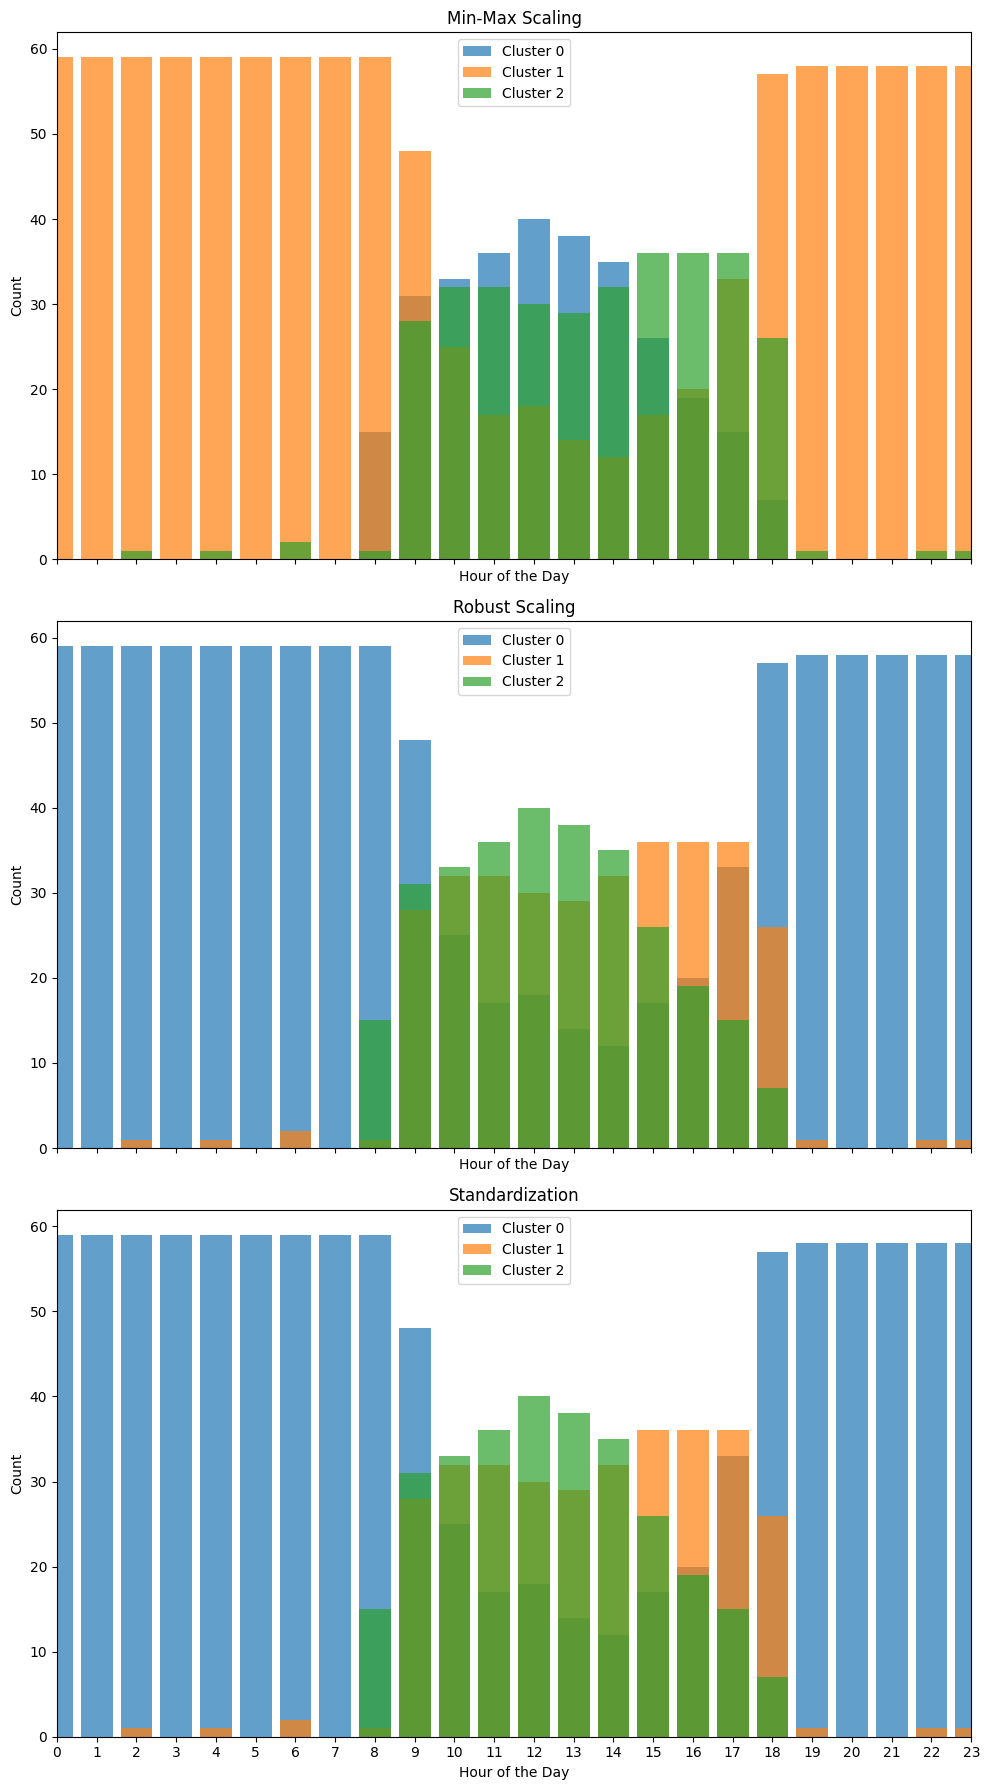

In [90]:
# Extract the unique scaling methods, clusters, and hours
scaling_methods = sorted(set([item[0][0] for item in sorted_hour_counts]))
clusters = sorted(set([item[0][1] for item in sorted_hour_counts]))
hours = sorted(set([item[0][2] for item in sorted_hour_counts]))

# Create a colormap for different clusters
cmap = plt.get_cmap('tab10')

# Create subplots for each scaling method
fig, axs = plt.subplots(len(scaling_methods), 1, figsize=(10, 6 * len(scaling_methods)), sharex=True)

# Iterate over the scaling methods and create a subplot for each
for i, scaling_method in enumerate(scaling_methods):
    # Filter the sorted hour counts based on the current scaling method
    method_counts = [(item[0][1], item[0][2], item[1]) for item in sorted_hour_counts if item[0][0] == scaling_method]

    # Initialize an array to store the counts for each cluster and hour
    cluster_counts = np.zeros((len(clusters), len(hours)))

    # Populate the cluster_counts array
    for cluster, hour, count in method_counts:
        cluster_index = clusters.index(cluster)
        hour_index = hours.index(hour)
        cluster_counts[cluster_index, hour_index] = count

    # Plot the histogram for the current scaling method
    for j in range(len(clusters)):
        axs[i].bar(hours, cluster_counts[j], color=cmap(j), alpha=0.7)

    # Set the x-axis limits and labels
    axs[i].set_xlim(0, 23)
    axs[i].set_xticks(hours)
    axs[i].set_xlabel('Hour of the Day')

    # Set the y-axis label
    axs[i].set_ylabel('Count')

    # Set the title
    axs[i].set_title(scaling_method)

    # Add a legend for the clusters
    legend_labels = [f'Cluster {cluster}' for cluster in clusters]
    axs[i].legend(legend_labels)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [91]:
# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(time_series_data.values)

# Perform K-means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
time_series_data['Cluster'] = clusters

# Calculate mean values for each cluster
cluster_stats = time_series_data.groupby('Cluster').mean()
cluster_stats.columns = [f'Mean Value ({col})' for col in cluster_stats.columns]
print(cluster_stats)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Mean Value (pir)  Mean Value (shade)  Mean Value (alight)  \
Cluster                                                              
0                0.373060           10.026808            23.847335   
1                0.027099            1.038481             1.362793   
2                4.333996           17.888080            39.338165   

         Mean Value (value)  
Cluster                      
0              32284.293417  
1               2952.201482  
2              26477.919104  


In [92]:
# Perform K-means clustering for each scaling method
k = 3
cluster_indexes = {}
cluster_information = {}
for method_name, scaler in scaling_methods.items():
    # Scale the data
    scaled_data = scaler.fit_transform(data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Add the cluster labels to the DataFrame
    data[f'Cluster ({method_name})'] = clusters

    # Get the data point indexes for each cluster
    cluster_indexes[method_name] = {}
    for cluster_label in range(k):
        cluster_indexes[method_name][cluster_label] = data.index[data[f'Cluster ({method_name})'] == cluster_label].tolist()

    # Get the cluster information
    cluster_information[method_name] = {}
    for cluster_label, indexes in cluster_indexes[method_name].items():
        cluster_data = data.loc[indexes]
        cluster_information[method_name][cluster_label] = cluster_data.describe()

# Print the cluster information
for method_name, clusters in cluster_information.items():
    print(f"Cluster Information - {method_name}")
    for cluster_label, cluster_data in clusters.items():
        print(f"Cluster: {cluster_label}")
        print(cluster_data)
        print()


AttributeError: ignored